# Project One


## Demographics and voting factors of the 2020 US Presidential Election results: A County-Level Analysis

## Introduction
Every four years, the world watches the United States as it undergoes its presidential election. For citizens, political siding has always been a significant factor in where people live. One research tracked voter files and migration data and found that “the percentage migrating to a different county but within the state varies from 1% to 30%” (Tam Cho, Gimpel, & Hui, 2012). This shows that there are trends between the type of people within a country and party support. Another study used a research method that explored the county level and concluded that geographical polarization exists across different counties (Kinsella, McTague, & Raleigh, 2015). Research proves that county demographics and geography impact political influence. Another paper has found that the COVID-19 cases negatively impacted Trump's vote shares in 2020 compared to 2016 (Baccini, Brodeur, & Weymouth, 2021). 

Further exploring the county level, other papers have also researched the US and voter turnout. They found that higher-income groups tend to have higher voter turnout than lower-income groups (Laurison, Brown, & Rastogi, 2021). Research closely related to demographics and voting factors on election results in the 2020 election found that “most counties that Trump won tended to be populated with people who are more white and less educated” compared to Biden-won counties (Smith, 2021). Most research regarding the 2020 election results focused on a county's demographic and socioeconomic factors. This project will also look into the voting results from other branches of the government. 

The research question will look at what demographic and voting factors within a county best explain the US 2020 presidential election results.
<br>

## Dataset Cleaning/Loading

The Primary data set “US Election 2020” will be combined with the secondary data “US Election Dataset” (Fontes, 2021) (essarabi, 2020).

The Independent variables are median income, population, degree attainment, urban density, racial makeup, governor party winner, house party winner, and senate party winner, all at the county level. The dependent variable will focus on the county's presidential election results. 

Median Income highlights the overall economic state of the county’s residents. The county’s financial state is a key factor in how residents potentially vote in cases to support specific policies or acts from one of the parties that directly benefit them. 

A county's population tells us about voter turnout and suburban or urban areas. Counties with drastically different populations could have different voting factors and patterns that can be explored across other counties in and at the state level.
Note: There were 57 values with counts equal to 2 for mode calculation.

Degree attainment indicates the percentage of residents who graduated with an associate degree or higher. Other research on this variable suggests that education influences political preference. 

Urban density tells us how populated a specific county is. This could impact how counties vote, as some parties may support more urban areas than less urbanized ones. Density could also indicate major cities within specific counties, which could link to other variables listed. 

Racial demographics show whether the county is dominated by white people or people of color. Race has always indicated potential political alignment due to specific policies that could benefit it. This information helps us determine whether a racial demographic has strong voting trends.

The winners of the governor, house, and senate races within each county may each show trends within the party and presidential party winners of that county. This can show party alignment within a county and how the winning party of these sectors could correlate with the presidential results.

<br>

In [7]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

# Load Dataset files
# load president_county_candidate.csv
president_county_cand = pd.read_csv('../Data/president_county_candidate.csv')
#president_county_cand.head()

# load senate_county_candidate.csv
senate_county_cand = pd.read_csv('../Data/senate_county_candidate.csv')
senate_county_cand.head()

# load governors_county_candidate.csv
governor_county_cand = pd.read_csv('../Data/governors_county_candidate.csv')
governor_county_cand.head()

# load house_county_candidate.csv
house_cand = pd.read_csv('../Data/house_candidate.csv')
house_cand.head()

# load alaska_president_county_candidate.csv
alaska_president_county_cand = pd.read_csv('../Data/alaska_president_county_candidate.csv')

# load maine_president_county_candidate.csv
maine_president_county_cand = pd.read_csv('../Data/maine_president_county_candidate.csv')

# load US_Election_dataset_v1.csv
us_election = pd.read_csv("../Data/US_Election_dataset_v1.csv")
#us_election.head()

# load State.csv
states = pd.read_csv('../Data/states.csv')
states.head()

# data cleaning: president_county_cand
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
# merge with states dataset
president_county_cand = pd.merge(president_county_cand, states, \
                    left_on='state', right_on='STATE', how="left")
# president_county_cand_won: filter in won is True
president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
president_county_cand_won

# data cleaning: governor_county_cand
# col 'state'
governor_county_cand['state'] = governor_county_cand['state'].str.upper()
governor_county_cand['state'] = governor_county_cand['state'].str.strip()
# col 'County Name'
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
governor_county_cand['county'] = governor_county_cand['county'].str.strip()
governor_county_cand['county'] = governor_county_cand['county'].str.replace(" COUNTY", "")
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
# filter in won is True
governor_county_cand_won = governor_county_cand.loc[governor_county_cand['won'] == True].copy()

# data cleaning: house_cand
# col 'state'
house_cand['district'] = house_cand['district'].str.upper()
house_cand['district'] = house_cand['district'].str.strip()
# filter in won is True
house_cand_won = house_cand.loc[house_cand['won'] == True].copy()
#print(house_cand_won)

# data cleaning: senate_county_cand
# col 'state'
senate_county_cand['state'] = senate_county_cand['state'].str.upper()
senate_county_cand['state'] = senate_county_cand['state'].str.strip()
# col 'County Name'
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
senate_county_cand['county'] = senate_county_cand['county'].str.strip()
senate_county_cand['county'] = senate_county_cand['county'].str.replace(" COUNTY", "")
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
# filter in records with max total_votes (won)
senate_county_cand_won = senate_county_cand.copy()
idx = senate_county_cand_won.groupby(['state', 'county'])['total_votes'].idxmax()
senate_county_cand_won = senate_county_cand_won.loc[idx]

# data cleaning: us_election
us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
us_election['state'] = us_election['state'].str.upper()
us_election['state'] = us_election['state'].str.strip()
# col 'County Name'
us_election['county'] = us_election['county'].str.upper()
us_election['county'] = us_election['county'].str.strip()
us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
us_election['county'] = us_election['county'].str.upper()




In [8]:
# Prepare necessary columns
# president_county_cand: prepare columns
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
party_map = {'DEM': 0.0, 'REP': 1.0}
president_county_cand['Party_Index'] = president_county_cand['party'].map(party_map)
president_county_cand['party'] = president_county_cand['party'].map(
    lambda x: party_dict.get(x, 'Third-Party'))

# president_county_cand_won: prepare columns
president_county_cand_won['Party_Index'] = president_county_cand_won['party']. \
                                           map(party_map)
president_county_cand_won['party'] = president_county_cand_won['party']. \
                                     map(lambda x: party_dict.get(x, 'Third-Party'))
#print(president_county_cand_won.head())

# senate_county_cand_won: prepare columns
senate_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in \
                                         senate_county_cand_won['party']]
senate_county_cand_won['party'] = senate_county_cand_won['party']. \
                                  map(lambda x: party_dict.get(x, 'Third-Party'))
#print(senate_county_cand_won.head())

# governor_county_cand_won: prepare columns
governor_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in \
                                           governor_county_cand_won['party']]
governor_county_cand_won['party'] = governor_county_cand_won['party']. \
                                    map(lambda x: party_dict.get(x, 'Third-Party'))
#print(governor_county_cand_won.head())

# house_cand_won: prepare columns
house_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in house_cand_won['party']]
house_cand_won['party'] = house_cand_won['party']. \
                                map(lambda x: party_dict.get(x, 'Third-Party'))
#print(house_cand_won.head())

# us_election: clean data and prepare new columns
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].replace({"": "0", "-": "0"})
us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
us_election['Median_Income_k'] = us_election['Median_Income'].div(1000.0)
us_election['Won_Vote'] = us_election[["2020 Democrat vote raw", \
                          "2020 Republican vote raw","2020 other vote raw"]].max(axis=1)
us_election['Total_Vote'] = us_election["2020 Democrat vote raw"] + \
                            us_election["2020 Republican vote raw"] + \
                            us_election["2020 other vote raw"]
us_election['Vote_Percentage'] = (us_election["Won_Vote"] / us_election["Total_Vote"]) * 100
us_election['Degree_Or_Higher_Percentage'] = \
        us_election["Associates Degree"].str.rstrip('%').astype('float') + \
        us_election["Bachelors Degree"].str.rstrip('%').astype('float') + \
        us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
us_election['Race_Index'] = np.where(us_election['NH-White percentage'] >= 50, 1.0, 0.0)                             

# merge datasets
final_df = pd.merge(president_county_cand_won, us_election, \
                    on=['state', 'county'], how="inner")



## Summary Statistics Tables

**Continuous Data**

|                       |  Mean     | Standard Deviation  | Median   |  Mode      |  Range               |  Min     |   Max     |  Count  |
| --------------------- | ------    | ------------------- | -------- | --------   | -------------------- | -----    | --------- | ------- |
| **Income**            | 63305.60  | 16819.01            | 60931.00 | 61250.00   | 17900.00 - 170463.00 | 17900.00 | 170463.00 | 3142    |
| **Population**        | 105456.34 | 335760.39           | 25698    | (see note) | 64 - 10014009        | 64       | 10014009  | 3143    |
| **Degree Attainment** | 33.11%    | 10.40%              | 31.60%   | 34.50%     | 7.50% - 81.00%       | 81.00%   | 7.50%     | 3143    |
| **Urban Density**     | 106.44    | 704.09              | 17.27    | 13.28      | 0.01 - 28048.18      | 0.01     | 28048.18  | 3143    |

The income table shows the overall median income for every county in the US. The range shows a larger difference in income. The table is skewed to the right, meaning more counties have lower median incomes. 

The population of each county gives us an overall idea of how big each county would be by looking at the mean. 

The degree attainment rate gives us an idea of the percentage of the county that has received some degree. The mean degree attainment for the counties is about 33%. This data is skewed right, and the mode percentage is roughly similar to the mean, meaning that most counties have a degree attainment rate of approximately 33%. 

The urban density for the counties shows some significant outliers, especially in major cities in specific counties, which causes the range to be huge. Also, the county's urban density is related to its population.

**Categorical Data**

|               |  Mean    | Standard Deviation  |  Count  |
| ------------- | ------   | ------------------- | ------- |
| **Governor**  | 0.921951 | 0.268379            | 1025    |
| **House**     | 0.488532 | 0.500443            | 436     |
| **Senate**    | 0.309378 | 0.462305            | 3423    |
| **Race**      | 0.871779 | 0.334389            | 3423    |

A dummy variable was assigned for the categorical data in the second table. For the political value (0=democrat, 1=republican) and race (0=white-dominated, 1=people of color-dominated). Republicans dominated the House votes at 0.92, while Senate seats leaned more for Democrats at 0.30.
<br>

In [10]:
# Get statistics

print("\n====================")
print("Governor:")
print("====================")
print(governor_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Governor - MEDIAN:")
print("====================")
print(governor_county_cand_won['Party_Index'].median())
print("\n====================")
print("Governor - MODE:")
print("====================")
print(governor_county_cand_won['Party_Index'].mode())

print("\n====================")
print("House:")
print("====================")
print(house_cand_won['Party_Index'].describe())
print("\n====================")
print("House - MEDIAN:")
print("====================")
print(house_cand_won['Party_Index'].median())
print("\n====================")
print("House - MODE:")
print("====================")
print(house_cand_won['Party_Index'].mode())

print("\n====================")
print("Senate:")
print("====================")
print(senate_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Senate - MEDIAN:")
print("====================")
print(senate_county_cand_won['Party_Index'].median())
print("\n====================")
print("Senate - MODE:")
print("====================")
print(senate_county_cand_won['Party_Index'].mode())

# generate statistics
print("\n====================")
print("4 Variables:")
print("====================")
columns = ["Median_Income", "Degree_Or_Higher_Percentage", "Total Population", "Density per square km", "Race_Index"]
print(us_election[columns].describe().transpose())
print("\n====================")
print("4 Variables - MEDIAN:")
print("====================")
print(us_election[columns].median())
print("\n====================")
print("4 Variables - MODE:")
print("====================")
print(us_election[columns].mode())





Governor:
count    1025.000000
mean        0.921951
std         0.268379
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Governor - MEDIAN:
1.0

Governor - MODE:
0    1.0
Name: Party_Index, dtype: float64

House:
count    436.000000
mean       0.488532
std        0.500443
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Party_Index, dtype: float64

House - MEDIAN:
0.0

House - MODE:
0    0.0
Name: Party_Index, dtype: float64

Senate:
count    3423.000000
mean        0.309378
std         0.462305
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Senate - MEDIAN:
0.0

Senate - MODE:
0    0.0
Name: Party_Index, dtype: float64

4 Variables:
                              count           mean            std       min  \
Median_Income                3142.0 

## Plots, Histograms, Figures



### Graph-1: Number of Counties Won by Party in the 2020 Presidential Election


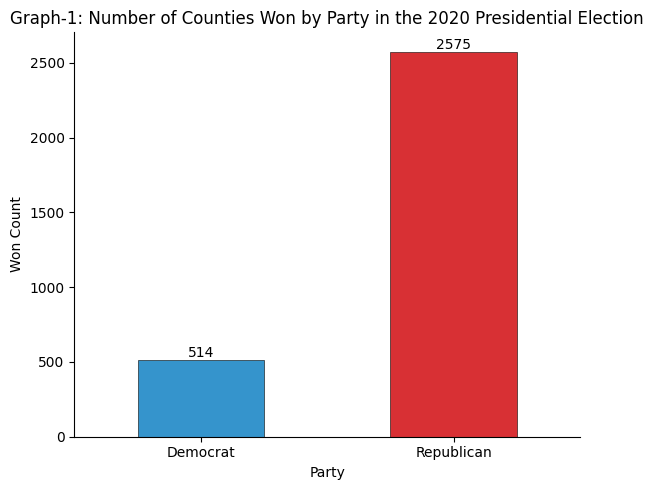

In [11]:
# Graph-1: Number of Counties Won by Party in the 2020 Presidential Election

# calculate value counts
counts = final_df['party'].value_counts()

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']

fig, ax = plt.subplots(figsize=(6, 5))
counts.sort_index().plot(kind='bar', color=colors, edgecolor='black', linewidth=0.4)

# plot barchart
plt.xticks(rotation=0)
ax.set_xlabel('Party')
ax.set_ylabel('Won Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Graph-1: Number of Counties Won by Party in the 2020 Presidential Election")
ax.bar_label(ax.containers[0])

# Show the plot
plt.tight_layout()
plt.show()

This graph shows the counties that voted for each party except four that voted for a third-party candidate. Although Republicans have a huge advantage in county wins compared to Democrats, this still results in them winning the presidential race. There might be underlying factors that explain the big difference in county wins.
<br>

### Graph-2: County Median Income and Vote Share in the 2020 Presidential Election


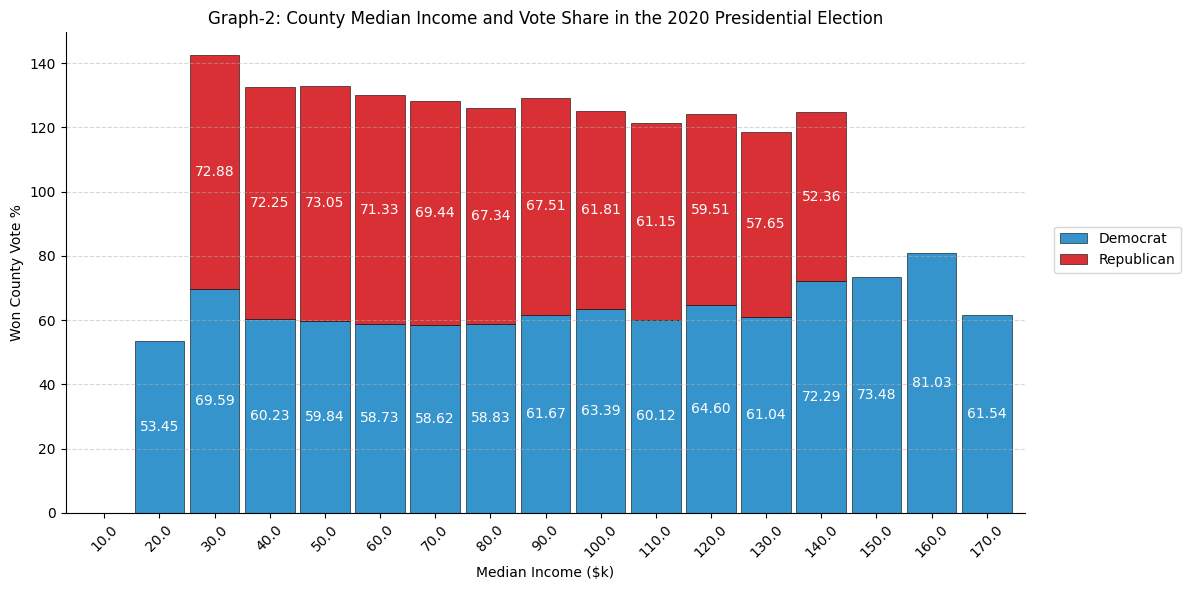

In [12]:
# Graph-2: County Median Income and Vote Share in the 2020 Presidential Election
# select columns to be ploted
data_df = final_df[['Median_Income_k', 'Vote_Percentage', 'party']]

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  

# group Education attainment in range
income_bins = np.arange(5.0, 180.0, 10.)
pivot1_df = data_df.copy()
pivot1_df['IncomeGroup'] = pd.cut(data_df["Median_Income_k"], bins=income_bins)
pivot1_df['IncomeGroupMid'] = pivot1_df['IncomeGroup'].apply(lambda x: x.mid)
pivot2_df = pivot1_df.groupby(['party', 'IncomeGroupMid'], observed=False).agg(
                Vote_Percentage_Mean=('Vote_Percentage', 'mean')).reset_index().copy()

# Pivot the DataFrame
pivot3_df = pivot2_df.pivot(index='IncomeGroupMid', columns='party', 
                            values='Vote_Percentage_Mean')

# Plotting with custom colors
ax = pivot3_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.9, 
                    color=colors, edgecolor='black', linewidth=0.4)

# Adding values on the bars
for i, party in enumerate(pivot3_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot3_df.columns):
        value = pivot3_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Median Income ($k)')
plt.ylabel('Won County Vote %')
plt.title('Graph-2: County Median Income and Vote Share in the 2020 Presidential Election')
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation = 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

This graph displays the median income and the winning vote percentage within the winning county's winning party, showing how much each county wins at different income levels. Higher-income groups tend to have higher vote percentages for Democrats, while lower-income counties support Republicans. The two lowest and highest ranges of counties were all won by Democrats.
<br>

### Graph-3: Vote Share for Winning Party by Degree Attainment Levels in the 2020 Presidential Election


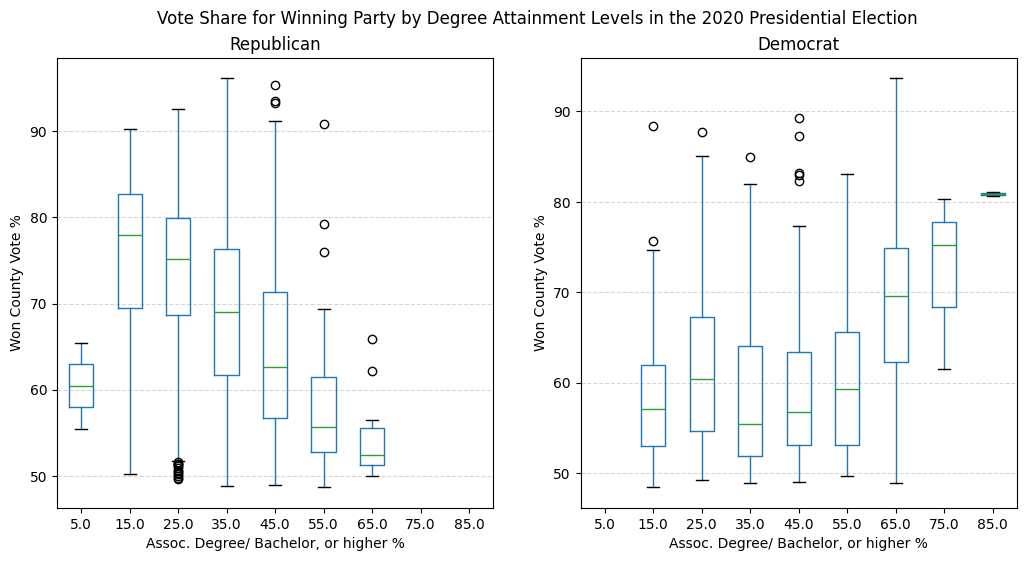

In [13]:
# Graph-3: Vote Share for Winning Party by Degree Attainment Levels in the 2020 Presidential Election
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Degree_Or_Higher_Percentage", "Vote_Percentage", "party"]]

# group Education attainment in range
education_bins = np.arange(0, 100, 10)
g2_df = data_df.copy()
g2_df['EducationGroup'] = pd.cut(data_df["Degree_Or_Higher_Percentage"], 
                                 bins=education_bins)
g2_df['EducationGroupMid'] = g2_df['EducationGroup'].apply(lambda x: x.mid)
rep_df = g2_df[g2_df['party']=='Republican'].copy()
rep_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], 
               ax=ax[0], grid = False) 
dem_df = g2_df[g2_df['party']=='Democrat'].copy()
dem_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], 
               ax=ax[1], grid = False) 

fig.suptitle("Vote Share for Winning Party by Degree Attainment Levels in"
             " the 2020 Presidential Election")
ax[0].grid(axis='y', linestyle='--', alpha=0.5)
ax[0].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[0].set_ylabel('Won County Vote %')
ax[0].set_title("Republican")
ax[1].grid(axis='y', linestyle='--', alpha=0.5)
ax[1].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[1].set_ylabel('Won County Vote %')
ax[1].set_title("Democrat")
plt.show()

This graph compares winning counties' vote share for Republicans and Democrats with their degree attainment rate. We can see that counties that vote Democrat have higher degree rates with it being skewed left compared to the Republicans being more skewed right. The average mean winning percentage for Republicans also gradually decreased after 15% compared to Democrats, which stayed even at around the 55% range and increased as the degree attainment increased.
<br>


### Graph-4: Vote Share by Population in the 2020 Presidential Election


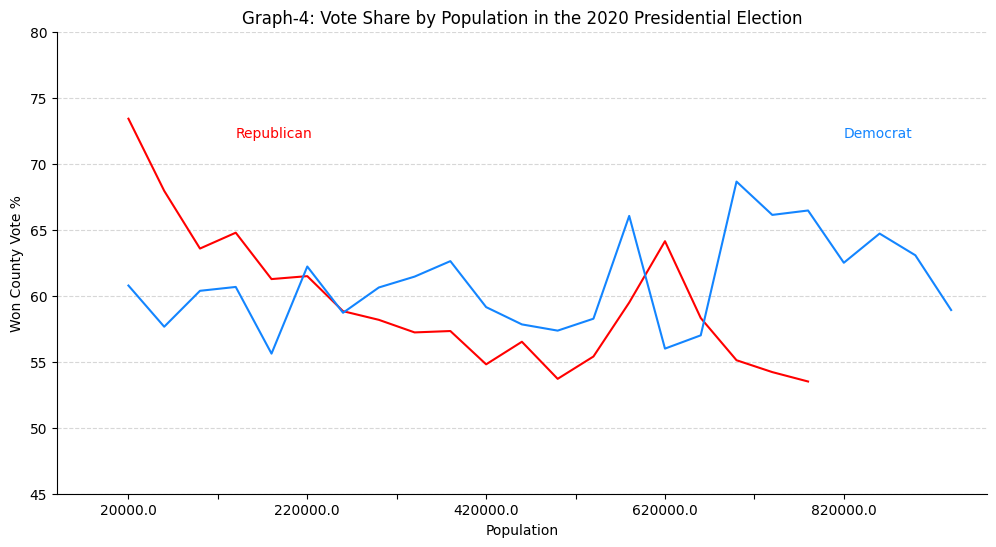

In [14]:
# Graph-4: Vote Share by Population in the 2020 Presidential Election

fig, ax = plt.subplots(figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Total Population", "Vote_Percentage", "party"]]

# group population in range
population_bins = np.arange(0, 1000000, 40000)

g4_df = data_df.copy()
g4_df['TotalPopulationGroup'] = pd.cut(data_df["Total Population"], 
                                       bins=population_bins)

# create Average of Vote Percentage
g4_df = g4_df.groupby(['TotalPopulationGroup', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote_Percentage', 'mean')
                ).reset_index()
g4_df['TotalPopulationGroupMid'] = g4_df['TotalPopulationGroup'].apply(
                                        lambda x: x.mid)
g4_df.set_index('TotalPopulationGroupMid', inplace=True)

# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}

rep_df = g4_df[g4_df['party']=='Republican'].copy()
rep_df.dropna(subset=["Averge_Vote_Percentage"], inplace=True)
rep_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, 
color=colors["Republican"], linewidth=1.5)

dem_df = g4_df[g4_df['party']=='Democrat'].copy()
dem_df.dropna(subset=["Averge_Vote_Percentage"], inplace=True)
dem_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, 
            color=colors["Democrat"], linewidth=1.5)

ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xlabel("Population")
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-4: Vote Share by Population in the "
             "2020 Presidential Election")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(45, 80)
ax.set_xlim(-2, 24)


ax.annotate("Democrat", (20, 72), color=colors["Democrat"])
ax.annotate("Republican", (3, 72), color=colors["Republican"]);


This shows the population and the county vote win percentage for each party represented by the different lines. We can see how the population affects their voting party support. Republican-supported counties tend to have lower population numbers within their counties, and we can see a decrease in winning vote percentage as the population increases. While for democrats, counties have somewhat of a constant winning vote percentage but more volatilities throughout.
<br>


### Graph-5: State Comparison of Presidential Votes by Party in the 2020 Election

In [15]:
from matplotlib.ticker import FuncFormatter

# Function to plot region state party vote chart
def plot_region_state_party_vote_chart(region: str, title: str, max_value: float, 
                                       chart_height: float):
    # select columns to be ploted
    data_df = president_county_cand.groupby(['state','party', 'REGION']).agg(
                                            {'total_votes': 'sum'})
    data_df = data_df.reset_index()
    data_df = data_df[data_df['REGION'] == region]
    data_df = data_df.reset_index()

    # Reshape the DataFrame using pivot_table
    pivot_df = data_df.pivot_table(index='state', columns='party', 
                                   values='total_votes', 
                                   aggfunc='sum').reset_index()

    #pivot_df = pivot_df.reindex(pivot_df['state'].sort_values(ascending=False).index)

    # Fill missing values with 0 (if any)
    pivot_df = pivot_df.fillna(0)

    # plot graph
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(11, chart_height))
    #fig, ax = plt.subplots(figsize=(11, 24))

    # Define custom colors for each type
    colors = {
        'Democrat': '#3594cc',  # Blue
        'Republican': '#d83034',  # Red
        'Third-Party': '#36b700'  # Green
    }

    # Number of states
    n_states = len(pivot_df['state'])
    
    # Height of the bars
    bar_height = 0.29
    
    # Positions for the bars
    index = np.arange(n_states)
    
    # Plotting each party
    for i, party in enumerate(['Democrat', 'Republican', 'Third-Party']):
        ax.barh(index + i * bar_height, pivot_df[party], bar_height, label=party, 
                color=colors[party])
    
    # Adding labels and title
    ax.set_xlabel('No. of votes')
    ax.set_ylabel('State')
    ax.set_title(title)
    #ax.set_title("Graph-5(a): Northeast States Comparison of Presidential Votes by "
    #             "Party in the 2020 Election")
    ax.set_yticks(index + bar_height)
    ax.set_yticklabels(pivot_df['state'])
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    
    # Format x-axis ticks as integers
    def format_votes(x, pos):
        return f'{int(x):,}'  # Format as integer with commas as thousand separators
    
    # format x-axis label
    ax.xaxis.set_major_formatter(FuncFormatter(format_votes))
    
    # Adjust y-axis limits to remove extra white space
    #ax.set_xlim(0, 12000000)
    ax.set_xlim(0, max_value)
    ax.set_ylim(-0.5, n_states)  # Adjust the limits to fit the bars tightly
    
    # Show the plot
    plt.tight_layout()
    plt.show()

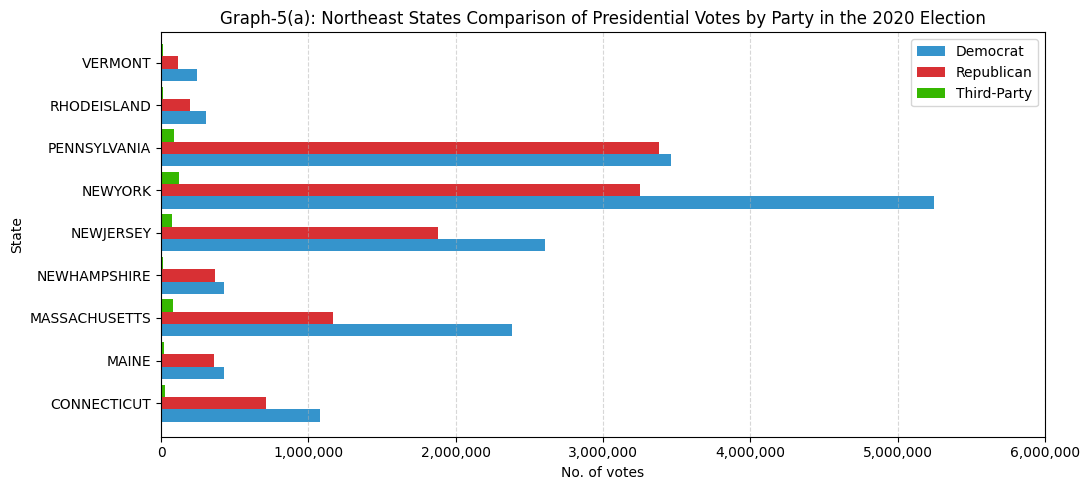

In [16]:
# Graph-5(a) Northeast states
title = "Graph-5(a): Northeast States Comparison of Presidential Votes by " \
        "Party in the 2020 Election"
plot_region_state_party_vote_chart('NORTHEAST', title, 6000000, 5)


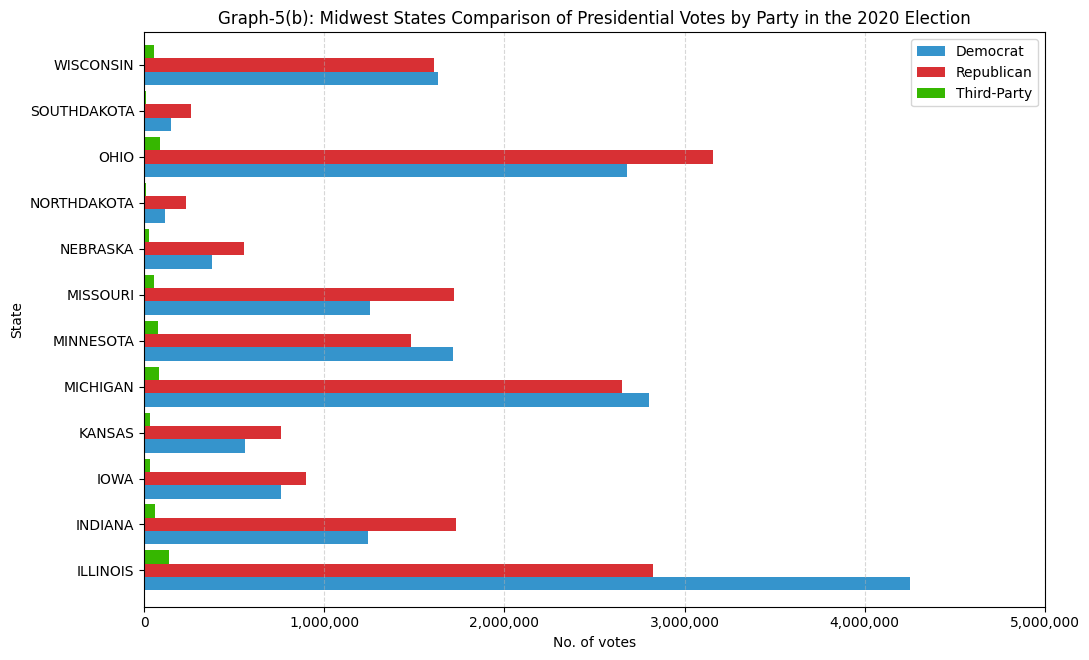

In [17]:
# Graph-5(b) Northeast states
title = "Graph-5(b): Midwest States Comparison of Presidential Votes by " \
        "Party in the 2020 Election"
plot_region_state_party_vote_chart('MIDWEST', title, 5000000, 6.7)


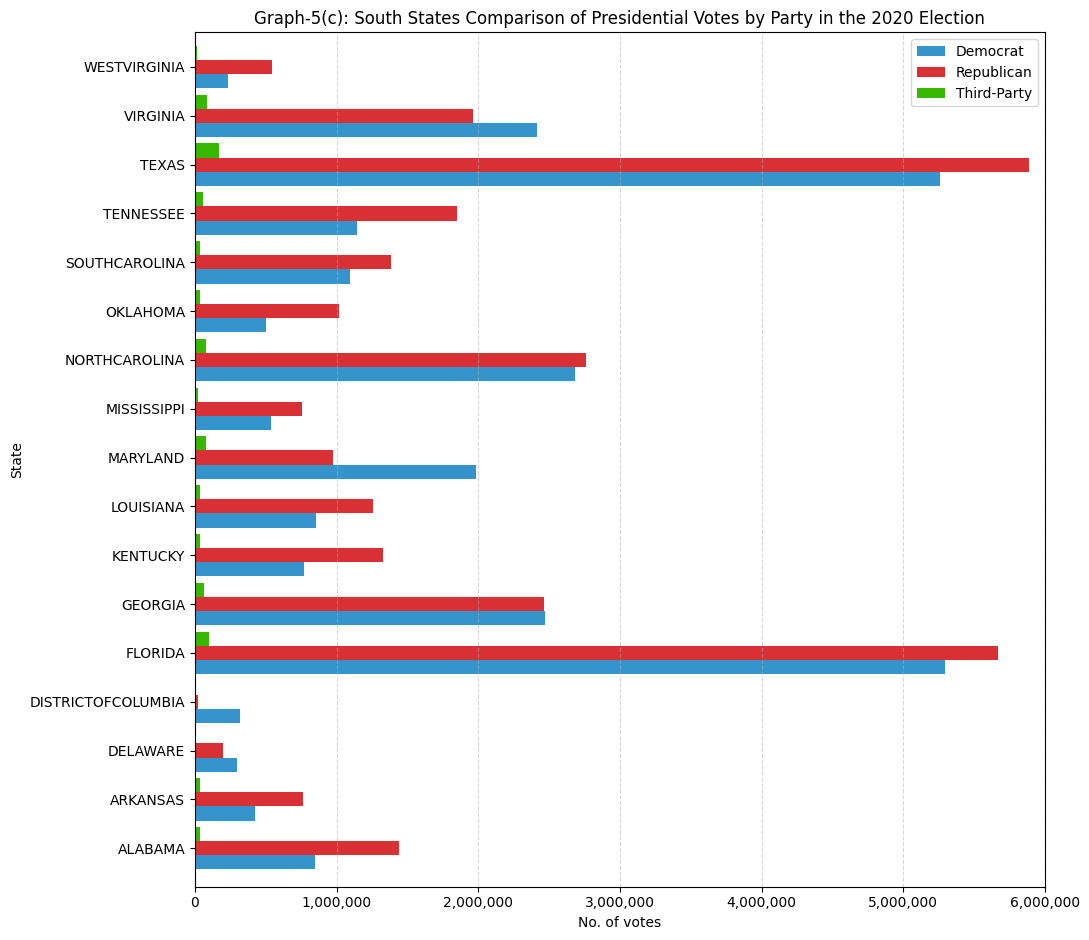

In [18]:
# Graph-5(c) Northeast states
title = "Graph-5(c): South States Comparison of Presidential Votes by " \
        "Party in the 2020 Election"
plot_region_state_party_vote_chart('SOUTH', title, 6000000, 9.5)

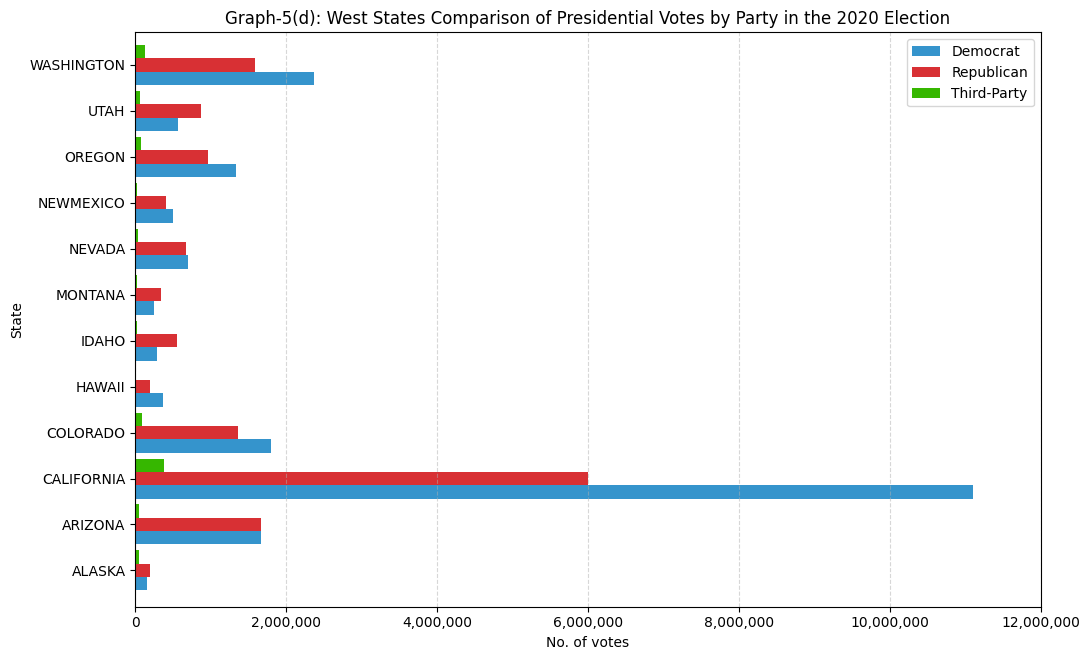

In [19]:
# Graph-5(d) West states
title = "Graph-5(d): West States Comparison of Presidential Votes by " \
        "Party in the 2020 Election"
plot_region_state_party_vote_chart('WEST', title, 12000000, 6.7)

This graph shows the number of votes for each party by state, comparing how each state voted. Smaller voting states tend to have more votes for Republicans, while larger voting states have more for Democrats. This aligns with our population graph, as our population also saw similar trends in party support.
<br>


### Graph-6: Vote Share by Urban Density  in the 2020 Presidential Election


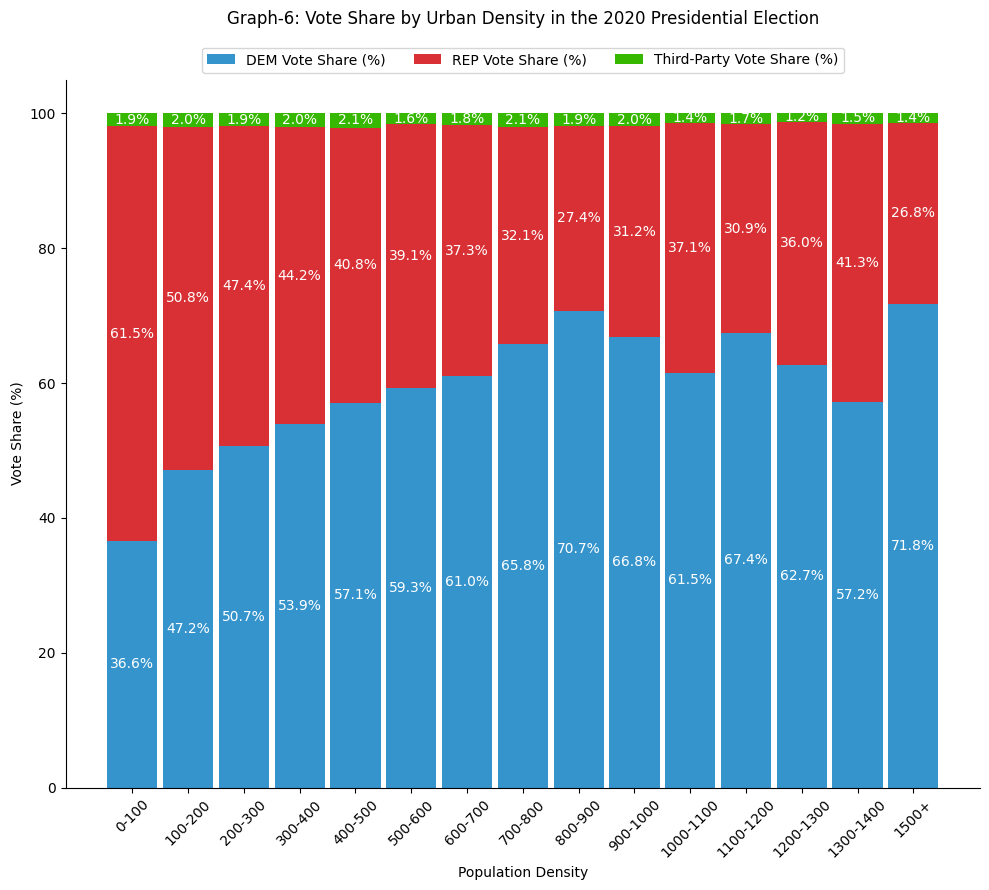

In [20]:
# Graph-6: Vote Share by Urban Density in the 2020 Presidential Election

# select columns to be ploted
data_df = us_election.copy()

# Define custom bins for population density: 0-1500 in steps of 100, and 1500+
density_bins = list(range(0, 1500, 100)) + [np.inf]  
# Assign each county to a population density bin
data_df['Density_Bin'] = pd.cut(data_df['Density per square km'], bins=density_bins, 
                                right=False)

# Group by the density bin and calculate the total votes for each party in each bin
grouped_df = data_df.groupby('Density_Bin', observed=False)[['2020 Democrat vote raw', 
             '2020 Republican vote raw', '2020 other vote raw', 'Total_Vote']].sum()

# Calculate the vote share percentage for each party in each bin
grouped_df['DEM_Share'] = grouped_df['2020 Democrat vote raw'] / grouped_df['Total_Vote'] * 100
grouped_df['REP_Share'] = grouped_df['2020 Republican vote raw'] / grouped_df['Total_Vote'] * 100
grouped_df['THIRDPARTY_Share'] = grouped_df['2020 other vote raw'] / grouped_df['Total_Vote'] * 100


# Plot the stacked histogram
fig, ax = plt.subplots(figsize=(10, 9))

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Define the x-axis labels (bin intervals)
x_labels = [f'{int(b.left)}-{int(b.right)}' if not np.isinf(b.right) \
            else '1500+' for b in grouped_df.index]

# Convert the vote share columns to NumPy arrays
dem_share = grouped_df['DEM_Share'].values
rep_share = grouped_df['REP_Share'].values
thirdparty_share = grouped_df['THIRDPARTY_Share'].values

# Plot the stacked bars
bar_width = 0.9
dem_bars = ax.bar(x_labels, dem_share, label='DEM Vote Share (%)', 
                  color=colors['Democrat'], width=bar_width)
rep_bars = ax.bar(x_labels, rep_share, bottom=dem_share, label='REP Vote Share (%)', 
                  color=colors['Republican'], width=bar_width)
thirdparty_bars = ax.bar(x_labels, thirdparty_share, bottom=dem_share + rep_share, 
                         label='Third-Party Vote Share (%)', 
                         color=colors['Third-Party'], width=bar_width)

# Add values inside the bars
def add_values(bars, bottom=None):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + height / 2 if bottom is None else bottom[i] + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', 
                color='white', fontsize=10)

# Add values to each stacked bar
add_values(dem_bars)
add_values(rep_bars, bottom=dem_share)
add_values(thirdparty_bars, bottom=dem_share + rep_share)

# Add labels and title
ax.set_xlabel('Population Density')
ax.set_ylabel('Vote Share (%)')
ax.set_title("Graph-6: Vote Share by Urban Density "
             "in the 2020 Presidential Election", pad=40)
# Move the legend to the top in one row
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='medium')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



This shows the population density and the counties' vote share percentage within the density range. It also indicates whether there are trends in party support depending on the population density of different counties. For example, more counties vote for Republicans in lower-density areas, while the opposite is true for Democrats.
<br>


### Graph-7: Proportion of Counties Won by Party Across Different Election Types

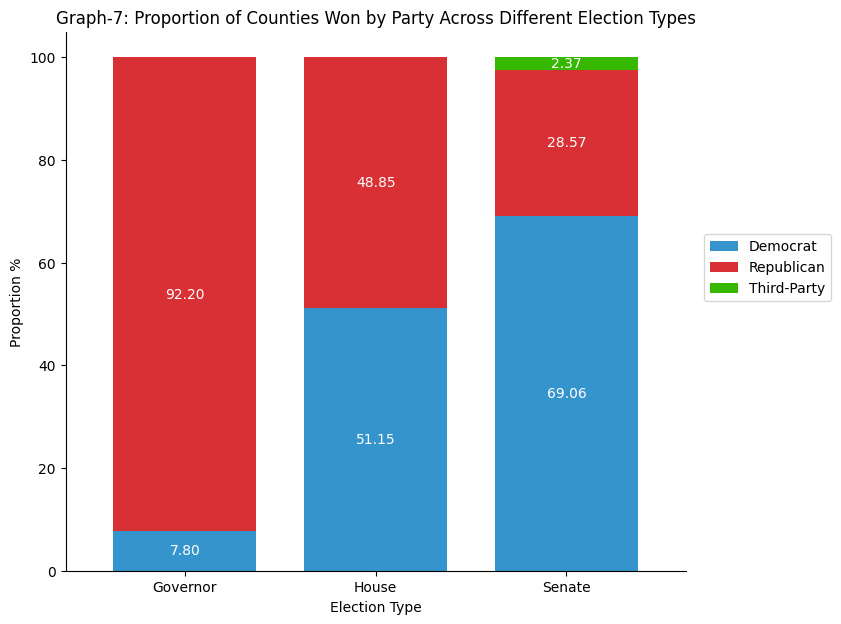

In [21]:
# Graph-7: Proportion of Counties Won by Party Across Different Election Types

# Prepare data
house_df = house_cand_won.groupby('party').agg(
                    Proportion=('party', 'count')).reset_index().copy()
house_total_count = house_cand_won['party'].count()
house_df['Proportion'] = (house_df['Proportion'] / house_total_count) * 100.0

senate_df = senate_county_cand_won.groupby('party').agg(
                    Proportion=('party', 'count')).reset_index().copy()
senate_total_count = senate_county_cand_won['party'].count()
senate_df['Proportion'] = (senate_df['Proportion'] / senate_total_count) * 100.0

governor_df = governor_county_cand_won.groupby('party').agg(
                    Proportion=('party', 'count')).reset_index().copy()
governor_total_count = governor_county_cand_won['party'].count()
governor_df['Proportion'] = (governor_df['Proportion'] / governor_total_count) * 100.0

# Combine the DataFrames
house_df['Election Type'] = 'House'
senate_df['Election Type'] = 'Senate'
governor_df['Election Type'] = 'Governor'
combined_df = pd.concat([house_df, senate_df, governor_df])

# Pivot the DataFrame
pivot_df = combined_df.pivot(index='Election Type', columns='party', 
                             values='Proportion')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
bar_width = 0.75
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 7), 
                   width=bar_width, color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Election Type')
plt.ylabel('Proportion %')
plt.title("Graph-7: Proportion of Counties Won by Party Across "
          "Different Election Types")
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()

This graph shows the proportion of counties won by each party and the three other election types. For the governor, most counties voted for the Republican party, while the House had a more even distribution. The Democratic party was more dominant in the Senate, with the third party winning some Senate seats.
<br>


### Graph-8: Party Wins in White-Dominated vs. Person of Color-Dominated Counties in the 2020 Presidential Election

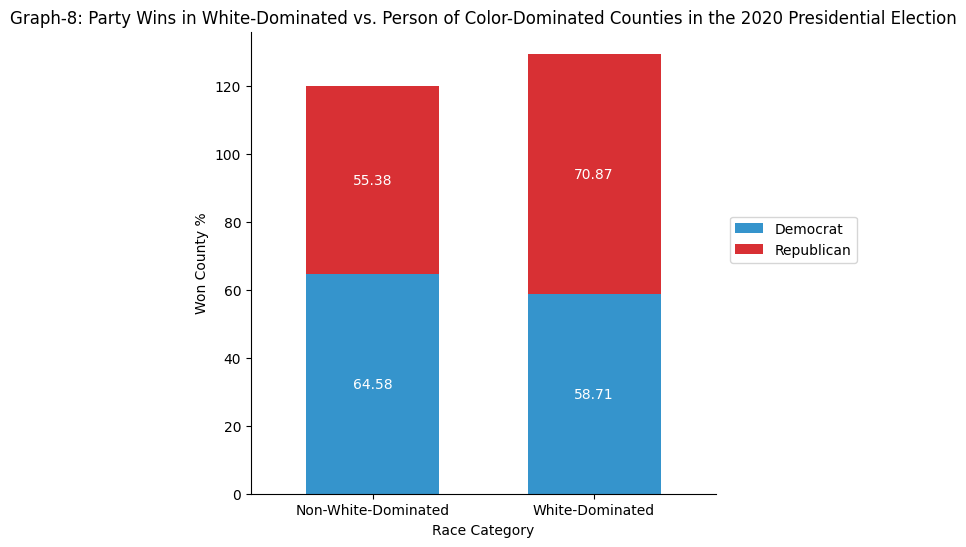

In [22]:
# Graph-8: Party Wins in White-Dominated vs. Person of Color-Dominated Counties in the 2020 Presidential Election

# select columns to be ploted
data_df = final_df.copy()
# Calculate NH-Rest percentage
data_df['NH-Rest'] = (
    data_df['NH-Black percentage'] + 
    data_df['NH-American Indian and Alaska Native percentage'] + 
    data_df['NH-Asian percentage'] + 
    data_df['NH-Native Hawaiian and Other Pacific Islander percentage'] + 
    data_df['NH-Some Other Race percentage'] + 
    data_df['NH-Two or More Races percentage']
)

# Classify counties as White-Dominated or Non-White-Dominated
data_df['Race_Type'] = np.where(
    data_df['NH-White percentage'] > data_df['NH-Rest'], 
    'White-Dominated', 
    'Non-White-Dominated'
)

data2_df = data_df[['party', 'Vote_Percentage', 'Race_Type']]

# create Average of Vote Percentage
data2_df = data2_df.groupby(['Race_Type', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote_Percentage', 'mean')
                ).reset_index()

# Pivot the DataFrame
pivot_df = data2_df.pivot(index='Race_Type', columns='party', 
                          values='Averge_Vote_Percentage')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
# Define custom colors for each type
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
bar_width = 0.6
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(6, 6), 
                   width=bar_width, color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Race Category')
plt.ylabel('Won County %')
plt.title("Graph-8: Party Wins in White-Dominated vs. Person of Color-Dominated "
          "Counties in the 2020 Presidential Election")
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


This graph shows the racially dominated counties and the winning party percentage for each county. In a non-white-dominated party, the Democrats have a slight edge, as most non-white counties usually win by around 64%. White-dominated counties have a higher winning percentage, around 70%, for the Republican party. The Democratic winning percentage is also smaller in white-dominated counties.
<br>


# Project Two

## The Message

In [186]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

In [187]:
# Load data and prepare columns
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

# Load state boundaries from the U.S. Census Bureau
#state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_5m.zip")
state_df = gpd.read_file("../Data/cb_2020_us_state_5m.zip")

# Load county boundaries from the U.S. Census Bureau
#counties_df = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_5m.zip")
counties_df = gpd.read_file("../Data/cb_2020_us_county_5m.zip")

# load president_county_candidate.csv
president_county_cand = pd.read_csv('../Data/president_county_candidate.csv')

# load alaska_president_county_candidate.csv
alaska_president_county_cand = pd.read_csv('../Data/alaska_president_county_candidate.csv')

# load maine_president_county_candidate.csv
maine_president_county_cand = pd.read_csv('../Data/maine_president_county_candidate.csv')

# load US_Election_dataset_v1.csv
us_election = pd.read_csv("../Data/US_Election_dataset_v1.csv")

# load State.csv
states = pd.read_csv('../Data/states.csv')
states.head()

# data cleaning: counties_df
# col 'NAME'
counties_df['NAME'] = counties_df['NAME'].str.upper()
counties_df['NAME'] = counties_df['NAME'].str.strip()
counties_df['NAME'] = counties_df['NAME'].str.replace(" COUNTY", "")
counties_df['NAME'] = counties_df['NAME'].str.upper()
counties_df['STATEFP_INT'] = counties_df['STATEFP'].astype(int)
# LOUISIANA  is missing " PARISH"
counties_df.loc[counties_df['STATEFP_INT'] == 22, 'NAME'] += " PARISH"

# data cleaning: president_county_cand
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
# clean up Alaska records
# remove alaska records
president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'ALASKA' ]
# add mapped alaska records to president_county_cand
president_county_cand = pd.concat([president_county_cand, alaska_president_county_cand])
# clean up Maine records
# remove maine records
president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'MAINE' ]
# add mapped maine records to president_county_cand
president_county_cand = pd.concat([president_county_cand, maine_president_county_cand])
# col 'party'
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
president_county_cand['party'] = president_county_cand['party'].map(
    lambda x: party_dict.get(x, 'Third-Party'))
# president_county_cand_won: filter in won is True
president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
president_county_cand_won

# data cleaning: us_election
us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
us_election['state'] = us_election['state'].str.upper()
us_election['state'] = us_election['state'].str.strip()
# col 'County Name'
us_election['county'] = us_election['county'].str.upper()
us_election['county'] = us_election['county'].str.strip()
us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
us_election['county'] = us_election['county'].str.replace(" CENSUS AREA", "")
us_election['county'] = us_election['county'].str.replace(" CITY AND BOROUGH", "")
us_election['county'] = us_election['county'].str.replace(" BOROUGH", "")
us_election['county'] = us_election['county'].str.replace(" MUNICIPALITY", "")
# us_election: clean data and prepare new columns
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].replace({"": "0", "-": "0"})
us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
us_election['DEM_Vote_Percentage'] = us_election["2020 Democrat vote raw"] / \
                                     (us_election["2020 Republican vote raw"] + \
                                     us_election["2020 Democrat vote raw"] + \
                                     us_election["2020 other vote raw"])
us_election['REP_Vote_Percentage'] = us_election["2020 Republican vote raw"] / \
                                     (us_election["2020 Republican vote raw"] + \
                                     us_election["2020 Democrat vote raw"] + \
                                     us_election["2020 other vote raw"])
us_election['Rel_DEM_Vote_Percentage'] = us_election["2020 Democrat vote raw"] / \
                                            (us_election["2020 Republican vote raw"] + \
                                            us_election["2020 Democrat vote raw"])
us_election['Rel_REP_Vote_Percentage'] = 1.0 - us_election['Rel_DEM_Vote_Percentage']
us_election['Degree_Or_Higher_Percentage'] = \
        us_election["Associates Degree"].str.rstrip('%').astype('float') + \
        us_election["Bachelors Degree"].str.rstrip('%').astype('float') + \
        us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
us_election['Degree_Or_Higher_Proportion'] = us_election['Degree_Or_Higher_Percentage'] / 100.0


# Define the function to categorize population density
def categorize_pop_density(density):
    if density < 39: 
        return 'Rural'
    elif density >= 39 and density <= 193:
        return 'Sub-Urban'
    else:
        return 'Urban'
us_election['Area_Type'] = us_election['Density per square km'].apply(categorize_pop_density)
#us_election['Area_Type'].value_counts()

# Define the function to categorize income
def categorize_income(income):
    if income < 50000: 
        return 'Low-Income'
    elif income >= 50000 and income <= 100000:
        return 'Mid-Income'
    else:
        return 'High-Income'
us_election['Income_Type'] = us_election['Median_Income'].apply(categorize_income)

# Define the function to categorize education
def categorize_degree(degree_percentage):
    if degree_percentage < 20: 
        return 'Low-Education'
    elif degree_percentage >= 20 and degree_percentage <= 55:
        return 'Mid-Education'
    else:
        return 'High-Education'
us_election['Education_Type'] = us_election['Degree_Or_Higher_Percentage'].apply(categorize_degree)

# merge datasets
president_county_cand_won = pd.merge(president_county_cand_won, states, \
                    left_on='state', right_on='STATE', how="left")
# Fill nan value with 0 (if any)
president_county_cand_won['STATEFP'] = president_county_cand_won['STATEFP'].fillna(0)

# merge with counties_df president_county_cand_won 
county_map_df = pd.merge(counties_df, president_county_cand_won, \
                    left_on=['STATEFP_INT', 'NAME'], right_on=['STATEFP', 'county'], how="inner")
#county_map['state'].count()

# merge with county_map_df with us_election
county_map2_df = pd.merge(county_map_df, us_election, \
                    left_on=['state', 'NAME'], right_on=['state', 'county'], how="inner")
#county_map2_df['state'].count()
#3091

county_map_df = county_map2_df.copy()

#county_map_df.count()

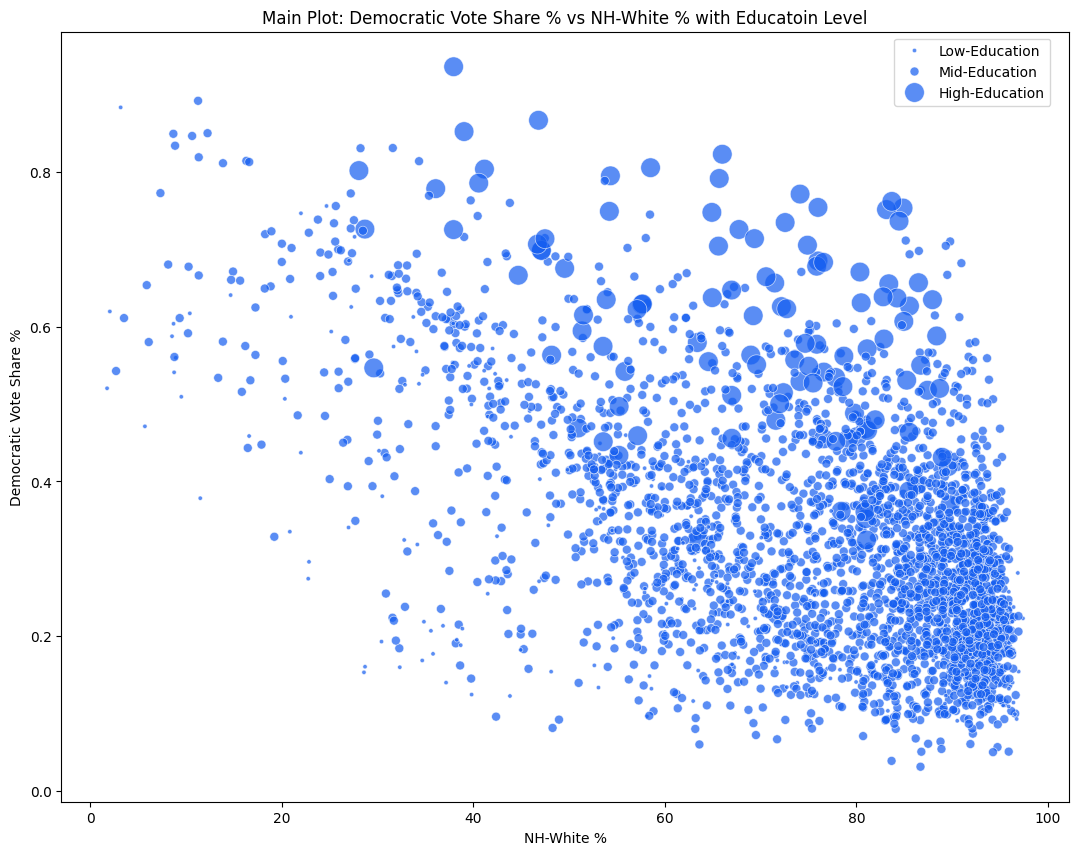

In [188]:
# Main Plot: Main Plot: Democratic Vote Share % vs NH-White % with Educatoin Level

from matplotlib.ticker import FuncFormatter

education_size = {
    'Low-Education': 12, 
    'Mid-Education': 20, 
    'High-Education': 60}  # Dot sizes for education categories

color_mapping = {
    'Low-Education': 'red', 
    'Mid-Education': 'green', 
    'High-Education': 'blue'}  # Dot colors for education categories

# Map education categories to dot sizes
county_map_df['Dot_Size'] = county_map_df['Education_Type'].map(education_size)

# Create the scatter plot
plt.figure(figsize=(13, 10))
scatter = sns.scatterplot(
    x='NH-White percentage',
    y='DEM_Vote_Percentage',
    size='Dot_Size',
    sizes=(10, 200),  # Range of dot sizes
    color='#145DF0',  # Dot color #3594cc
    #hue='Education_Type',  # Use 'Education_Type' for color
    #palette=color_mapping,  # Map colors to Education_Type categories
    alpha=0.70,  # Transparency of dots
    data=county_map_df
)

# Add title and labels
plt.title('Main Plot: Democratic Vote Share % vs NH-White % with Educatoin Level')
plt.xlabel('NH-White %')
plt.ylabel('Democratic Vote Share %')

#plt.xlim(0, 50)  # Set x-axis range to 0-100

# Add a legend for dot sizes
plt.legend(title='', loc='upper right')
# Customize the legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ['Low-Education', 'Mid-Education', 'High-Education'], title='', bbox_to_anchor=(0.82, 1), loc='upper left')


# Show the plot
plt.show()

In [189]:
# Main Plot
from matplotlib.ticker import FuncFormatter

income_size = {'Low-Income': 30, 'Mid-Income': 60, 'High-Income': 100}  # Dot sizes for income categories

# Define a vectorized custom scaling function
def custom_scale(y):
    y = np.asarray(y)  # Ensure y is a numpy array
    return np.where(y <= 100, y, 100 + (y - 100) / 1000)  # Apply scaling

# Map income categories to dot sizes
data['Dot Size'] = data['Income'].map(income_size)


# Map income categories to dot sizes
county_map_df['Dot_Size'] = county_map_df['Income_Type'].map(income_size)

# Create the scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='Density per square km',
    y='REP_Vote_Percentage',
    size='Dot_Size',
    sizes=(30, 200),  # Range of dot sizes
    color='green',  # Dot color
    alpha=0.7,  # Transparency of dots
    data=county_map_df
)

# Apply custom scaling to the Y-axis
plt.yscale('function', functions=(custom_scale, lambda y: y))  # Forward and inverse transformations

# Add title and labels
plt.title('Main Plot: Democratic Vote Share % vs Urban Density')
plt.xlabel('Urban Density')
plt.ylabel('Democratic Vote Share %')

plt.xlim(0, 2000)  # Set x-axis range to 0-100

# Customize the legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ['Low-Income', 'Mid-Income', 'High-Income'], title='', bbox_to_anchor=(0.82, 1), loc='upper left')

# Show the plot
plt.show()

NameError: name 'data' is not defined

## Maps and Interpretations

In [190]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

In [191]:
# Load data and prepare columns
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

# Load state boundaries from the U.S. Census Bureau
#state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_5m.zip")
state_df = gpd.read_file("../Data/cb_2020_us_state_5m.zip")

# Load county boundaries from the U.S. Census Bureau
#counties_df = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_5m.zip")
counties_df = gpd.read_file("../Data/cb_2020_us_county_5m.zip")

# load president_county_candidate.csv
president_county_cand = pd.read_csv('../Data/president_county_candidate.csv')

# load alaska_president_county_candidate.csv
alaska_president_county_cand = pd.read_csv('../Data/alaska_president_county_candidate.csv')

# load maine_president_county_candidate.csv
maine_president_county_cand = pd.read_csv('../Data/maine_president_county_candidate.csv')

# load US_Election_dataset_v1.csv
us_election = pd.read_csv("../Data/US_Election_dataset_v1.csv")

# load State.csv
states = pd.read_csv('../Data/states.csv')
states.head()

# data cleaning: counties_df
# col 'NAME'
counties_df['NAME'] = counties_df['NAME'].str.upper()
counties_df['NAME'] = counties_df['NAME'].str.strip()
counties_df['NAME'] = counties_df['NAME'].str.replace(" COUNTY", "")
counties_df['NAME'] = counties_df['NAME'].str.upper()
counties_df['STATEFP_INT'] = counties_df['STATEFP'].astype(int)
# LOUISIANA  is missing " PARISH"
counties_df.loc[counties_df['STATEFP_INT'] == 22, 'NAME'] += " PARISH"

# data cleaning: president_county_cand
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
# clean up Alaska records
# remove alaska records
president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'ALASKA' ]
# add mapped alaska records to president_county_cand
president_county_cand = pd.concat([president_county_cand, alaska_president_county_cand])
# clean up Maine records
# remove maine records
president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'MAINE' ]
# add mapped maine records to president_county_cand
president_county_cand = pd.concat([president_county_cand, maine_president_county_cand])
# col 'party'
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
president_county_cand['party'] = president_county_cand['party'].map(
    lambda x: party_dict.get(x, 'Third-Party'))
# president_county_cand_won: filter in won is True
president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
president_county_cand_won

# data cleaning: us_election
us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
us_election['state'] = us_election['state'].str.upper()
us_election['state'] = us_election['state'].str.strip()
# col 'County Name'
us_election['county'] = us_election['county'].str.upper()
us_election['county'] = us_election['county'].str.strip()
us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
us_election['county'] = us_election['county'].str.replace(" CENSUS AREA", "")
us_election['county'] = us_election['county'].str.replace(" CITY AND BOROUGH", "")
us_election['county'] = us_election['county'].str.replace(" BOROUGH", "")
us_election['county'] = us_election['county'].str.replace(" MUNICIPALITY", "")
# us_election: clean data and prepare new columns
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].replace({"": "0", "-": "0"})
us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
us_election['DEM_Vote_Percentage'] = us_election["2020 Democrat vote raw"] / \
                                     (us_election["2020 Republican vote raw"] + \
                                     us_election["2020 Democrat vote raw"] + \
                                     us_election["2020 other vote raw"])
us_election['REP_Vote_Percentage'] = us_election["2020 Republican vote raw"] / \
                                     (us_election["2020 Republican vote raw"] + \
                                     us_election["2020 Democrat vote raw"] + \
                                     us_election["2020 other vote raw"])
us_election['Rel_DEM_Vote_Percentage'] = us_election["2020 Democrat vote raw"] / \
                                            (us_election["2020 Republican vote raw"] + \
                                            us_election["2020 Democrat vote raw"])
us_election['Rel_REP_Vote_Percentage'] = 1.0 - us_election['Rel_DEM_Vote_Percentage']
us_election['Degree_Or_Higher_Percentage'] = \
        us_election["Associates Degree"].str.rstrip('%').astype('float') + \
        us_election["Bachelors Degree"].str.rstrip('%').astype('float') + \
        us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
us_election['Degree_Or_Higher_Proportion'] = us_election['Degree_Or_Higher_Percentage'] / 100.0


# Define the function to categorize population density
def categorize_pop_density(density):
    if density < 39: 
        return 'Rural'
    elif density >= 39 and density <= 193:
        return 'Sub-Urban'
    else:
        return 'Urban'
us_election['Area_Type'] = us_election['Density per square km'].apply(categorize_pop_density)
#us_election['Area_Type'].value_counts()

# Define the function to categorize income
def categorize_income(income):
    if income < 50000: 
        return 'Low-Income'
    elif income >= 50000 and income <= 100000:
        return 'Mid-Income'
    else:
        return 'High-Income'
us_election['Income_Type'] = us_election['Median_Income'].apply(categorize_income)

# Define the function to categorize education
def categorize_degree(degree_percentage):
    if degree_percentage < 20: 
        return 'Low-Education'
    elif degree_percentage >= 20 and degree_percentage <= 55:
        return 'Mid-Education'
    else:
        return 'High-Education'
us_election['Education_Type'] = us_election['Degree_Or_Higher_Percentage'].apply(categorize_degree)

# merge datasets
president_county_cand_won = pd.merge(president_county_cand_won, states, \
                    left_on='state', right_on='STATE', how="left")
# Fill nan value with 0 (if any)
president_county_cand_won['STATEFP'] = president_county_cand_won['STATEFP'].fillna(0)

# merge with counties_df president_county_cand_won 
county_map_df = pd.merge(counties_df, president_county_cand_won, \
                    left_on=['STATEFP_INT', 'NAME'], right_on=['STATEFP', 'county'], how="inner")
#county_map['state'].count()

# merge with county_map_df with us_election
county_map2_df = pd.merge(county_map_df, us_election, \
                    left_on=['state', 'NAME'], right_on=['state', 'county'], how="inner")
#county_map2_df['state'].count()
#3091

county_map_df = county_map2_df.copy()

#county_map_df.count()

### Map-1: Won Share by County in the 2020 Presidential Election

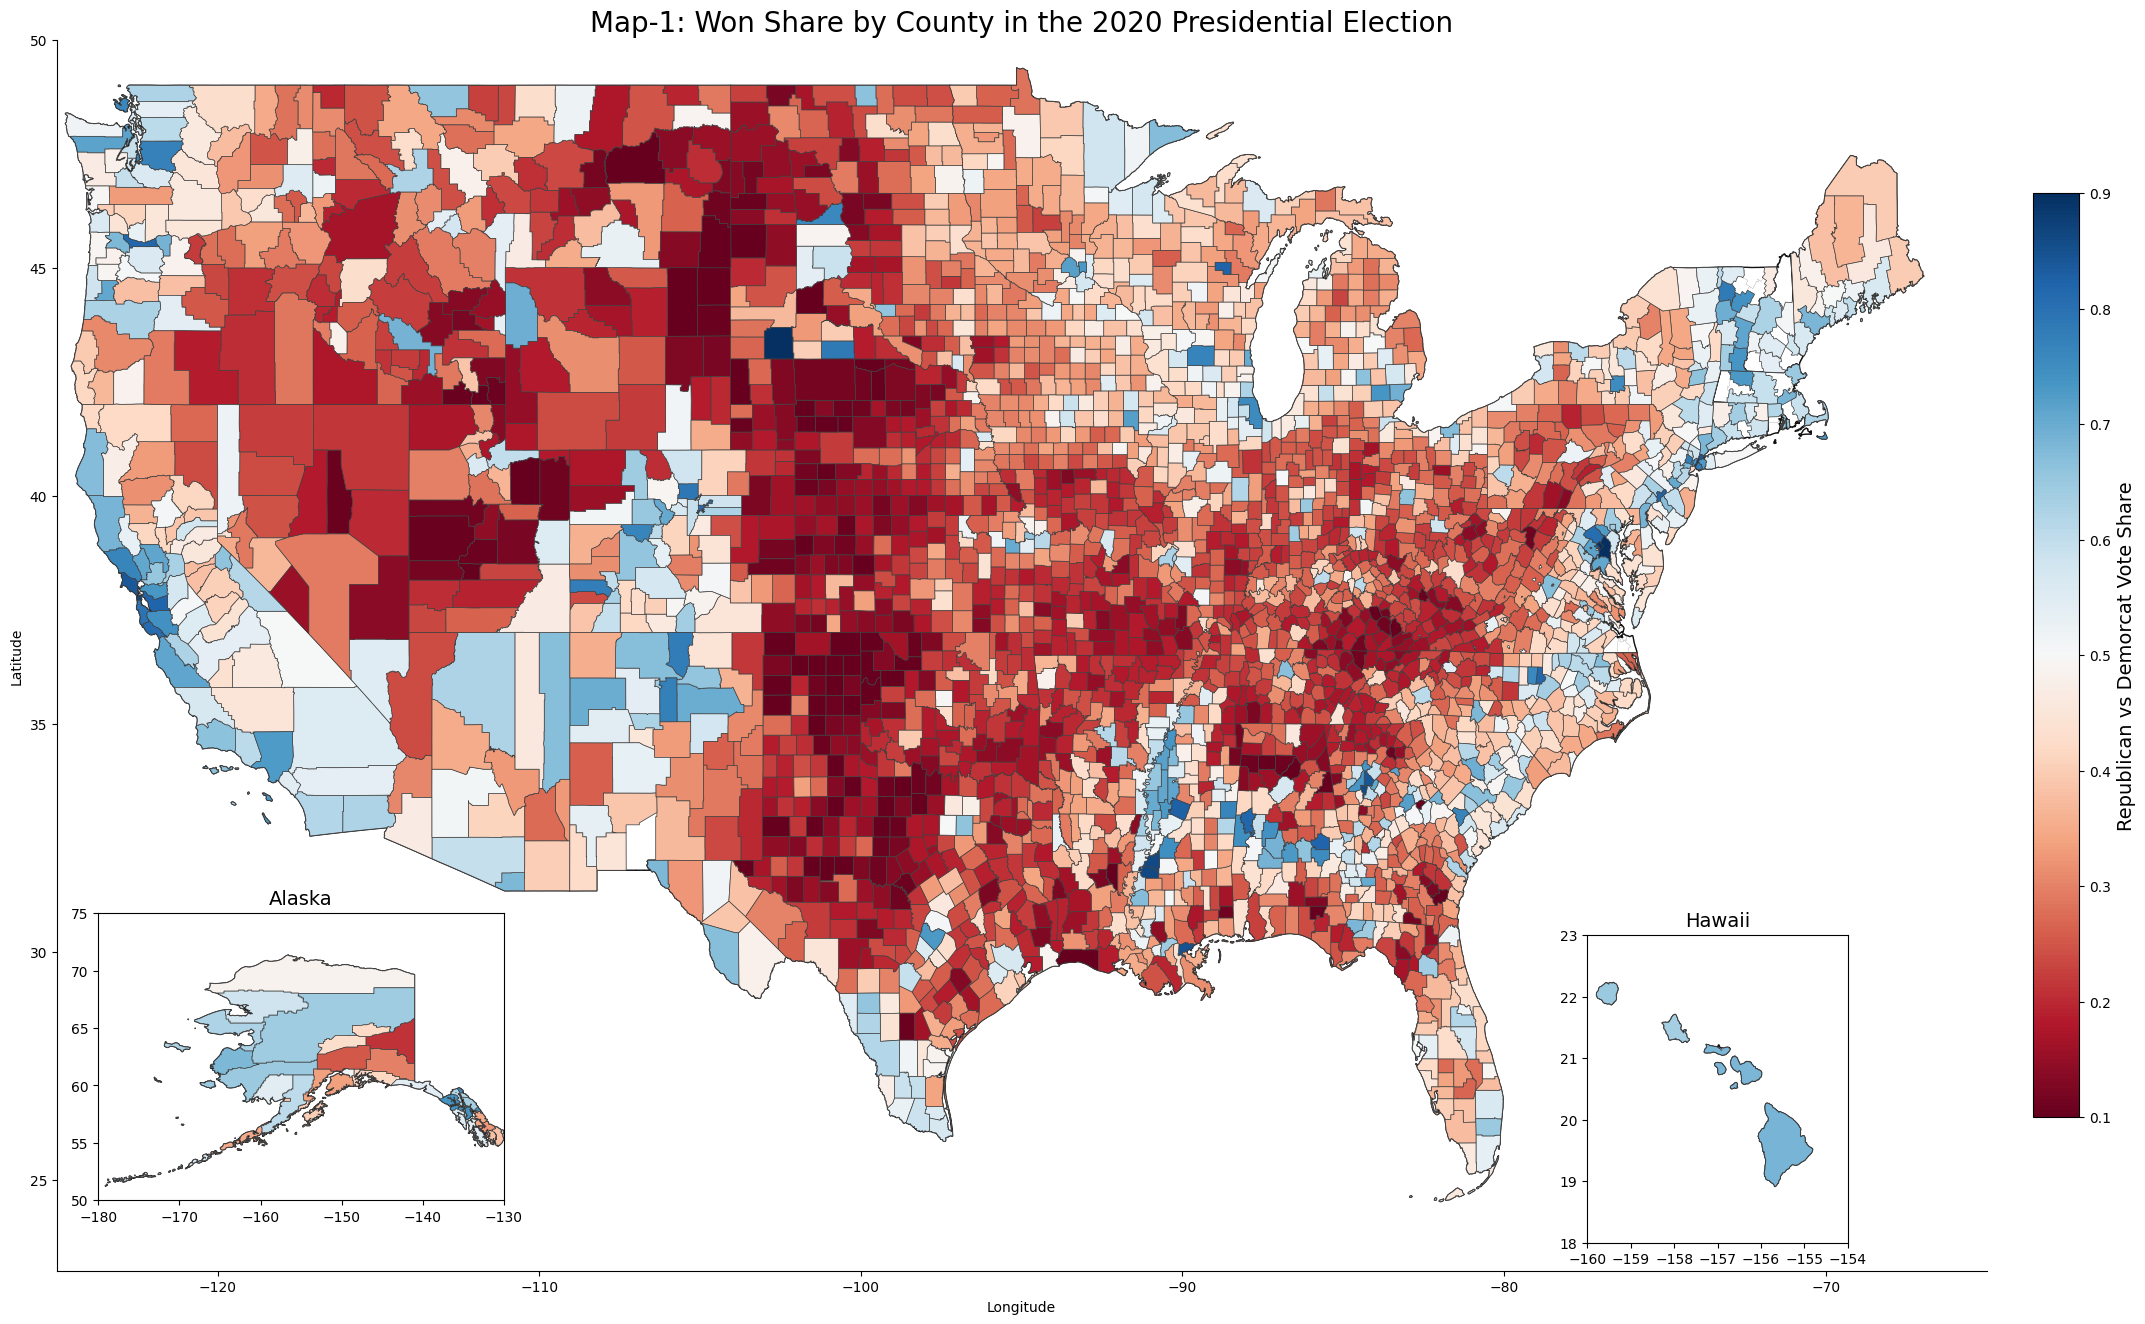

In [192]:
# Map-1: Won Share by County in the 2020 Presidential Election

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="gray", color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="gray", color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)


# setup 'party_color'
county_map_df['party_color'] = county_map_df['party'].map(lambda x: colors.get(x, '#e6ebed'))
# Plot continental
county_map_df.plot(
    ax=gax, edgecolor='#404040', column='Rel_DEM_Vote_Percentage', legend=False, 
    linewidth=0.5, cmap='RdBu', vmin=0.1, vmax=0.9)
# Plot Hawaii
county_map_df.plot(
    ax=ax_inset_hawaii, edgecolor='#404040', column='Rel_DEM_Vote_Percentage', legend=False, 
    linewidth=0.5, cmap='RdBu', vmin=0.1, vmax=0.9)
# Plot Alaska
county_map_df.plot(
    ax=ax_inset_alaska, edgecolor='#404040', column='Rel_DEM_Vote_Percentage', legend=False, 
    linewidth=0.5, cmap='RdBu', vmin=0.1, vmax=0.9)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Map-1: Won Share by County in the 2020 Presidential Election', fontsize=20)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.4, pad=0.02)
cbar.set_label('Republican vs Demorcat Vote Share', fontsize=14)

# legend position and font size
#gax.legend(bbox_to_anchor=(0.1, 1.0), ncol=3, fontsize='medium')

#gax.annotate('Republican vs Demorcat Vote Share',xy=(-66, 24.5), fontsize=14)

#gax.set_axis_off()

# Display the map
plt.show()


### Map-2: Won Share by County on Urban Density in the 2020 Presidential Election

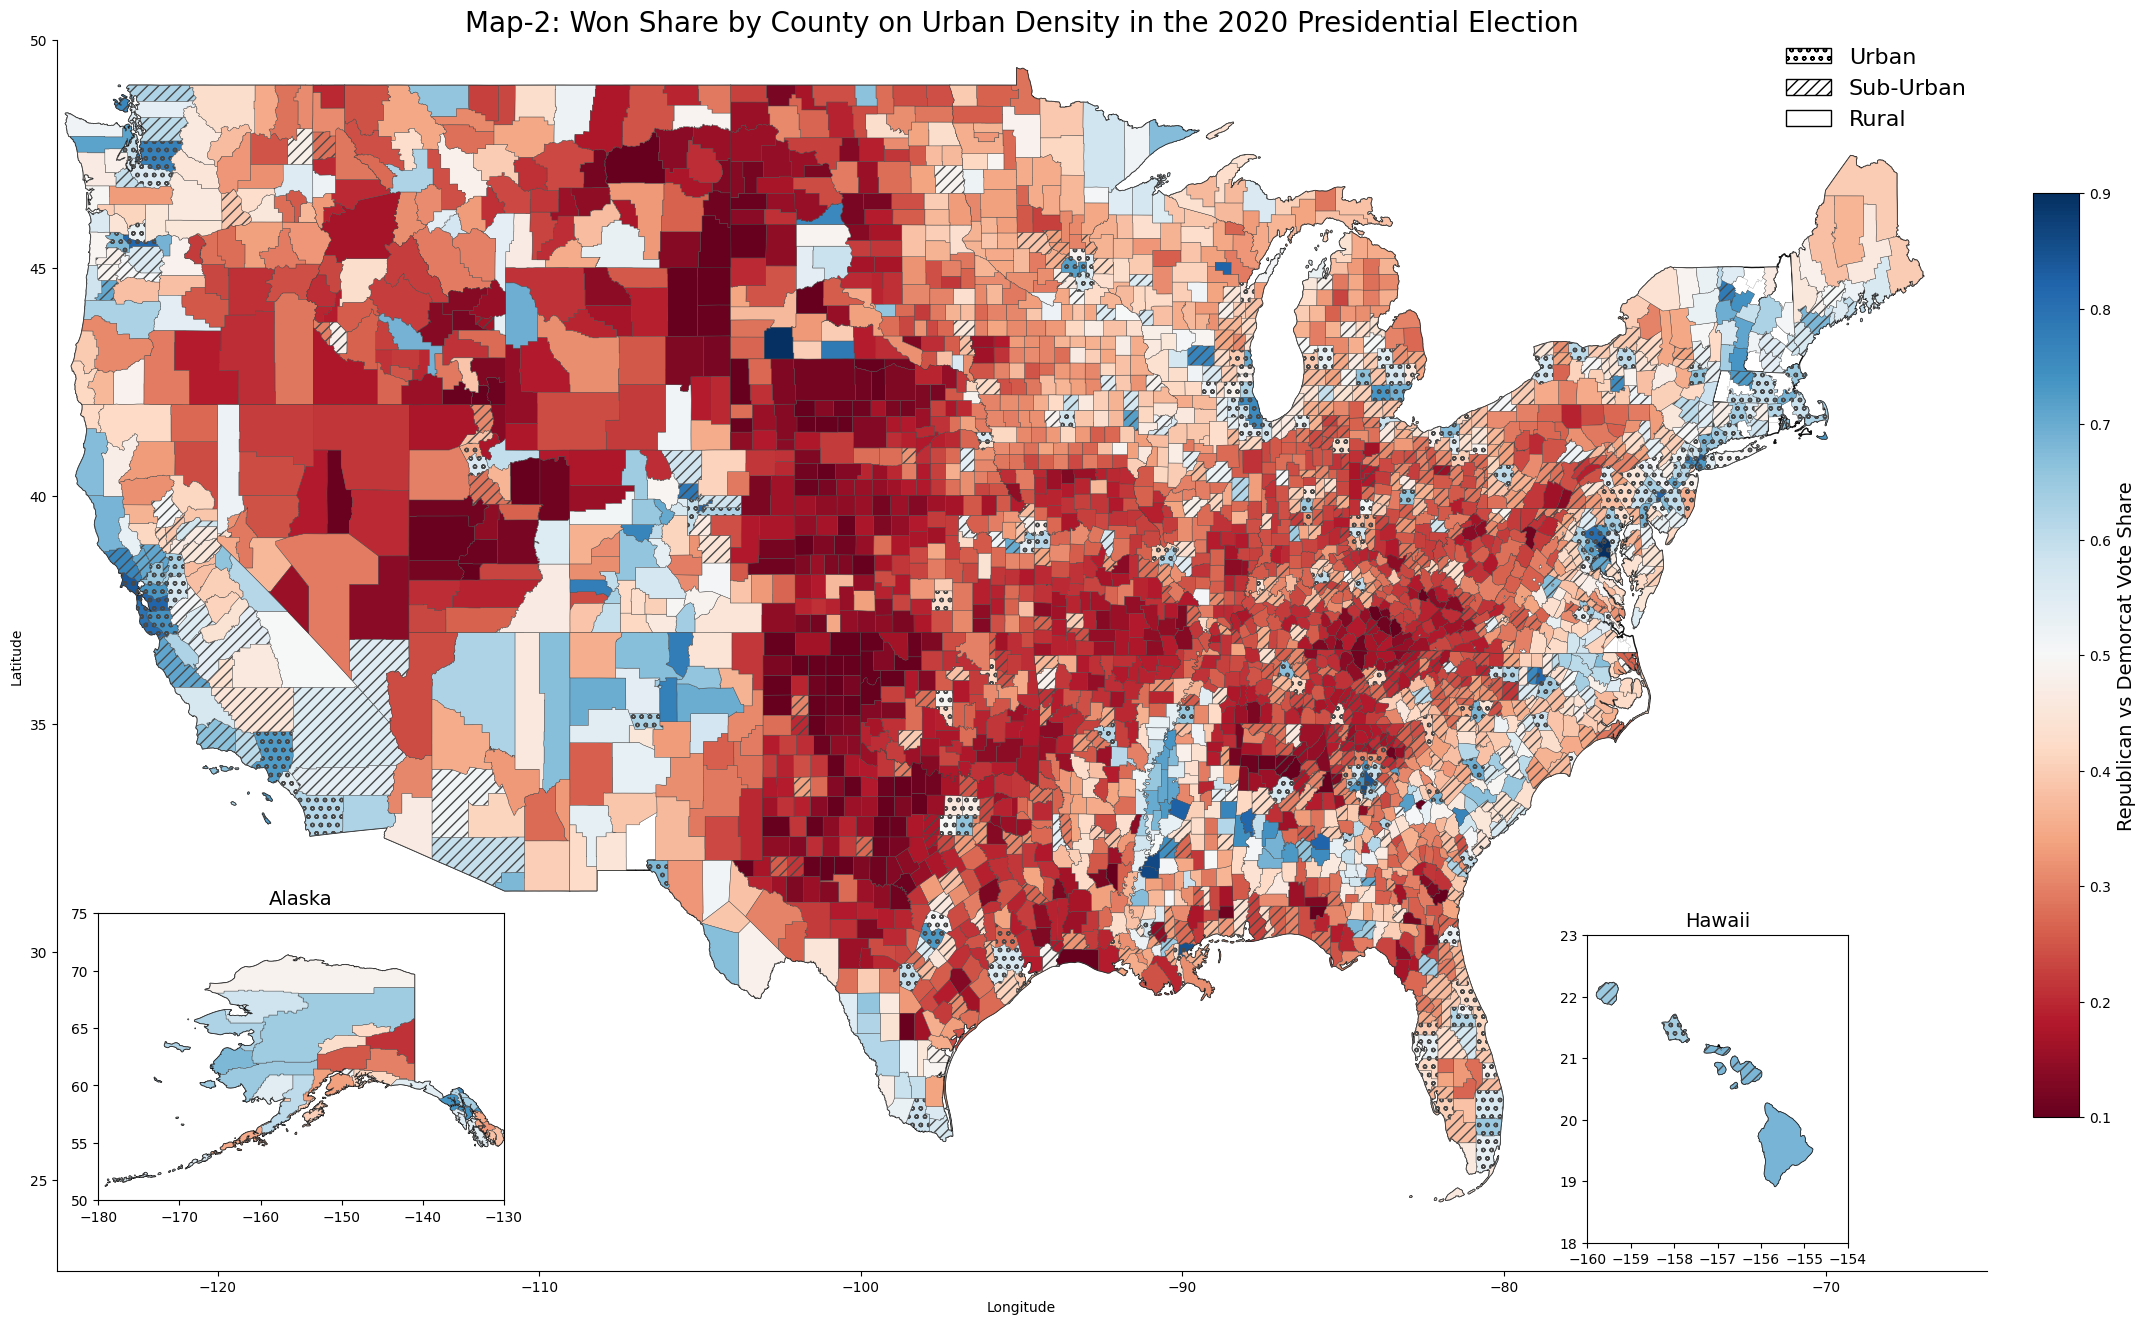

In [193]:
#Map-2: Won Share by County on Urban Density in the 2020 Presidential Election

# Define custom colors for each type
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}
# setup 'party_color'
#county_map_df['party_color'] = county_map_df['party'].map(lambda x: colors.get(x, '#e6ebed'))
# Define custom pattern for each type
area_pattern = {
    'Urban': "oo", 
    'Sub-Urban': "///",
    'Rural': ""
}
# Add 'area_pattern' column to the GeoDataFrame
county_map_df['area_pattern'] = county_map_df['Area_Type'].map(lambda x: area_pattern.get(x, ''))

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="black", color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="black", color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot continental 
for area_type, pattern in area_pattern.items():
    sub_area = county_map_df[county_map_df['Area_Type'] == area_type]
    # Plot continental 
    sub_area.plot(
        ax=gax, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
        cmap='RdBu', vmin=0.1, vmax=0.9,
        linewidth=0.3, hatch=pattern
    )
    # Plot Hawaii
    sub_area.plot(
            ax=ax_inset_hawaii, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
            cmap='RdBu', vmin=0.1, vmax=0.9,
            linewidth=0.3, hatch=pattern
    )
    # Plot Alaska
    sub_area.plot(
            ax=ax_inset_alaska, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
            cmap='RdBu', vmin=0.1, vmax=0.9,
            linewidth=0.3, hatch=pattern
    )

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Map-2: Won Share by County on Urban Density in the 2020 Presidential Election', fontsize=20)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.4, pad=0.02)
cbar.set_label('Republican vs Demorcat Vote Share', fontsize=14)

# Add a legend for hatch patterns
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch=pattern, label=area_type)
    for area_type, pattern in area_pattern.items()
]
hatch_legend = gax.legend(handles=legend_elements, loc='upper right',
          bbox_to_anchor=(1.0, 1.01),  # Move the legend up (y-coordinate > 1)
          frameon=False, # remove borders,
          prop={'size': 16}, fontsize='medium')
hatch_legend.get_title().set_fontsize(14)  # Set the title font size

# legend position and font size
#gax.legend(bbox_to_anchor=(0.1, 1.0), ncol=3, fontsize='medium')

#gax.annotate('Republican vs Demorcat Vote share',xy=(-65, 23.5), fontsize='medium')

#gax.set_axis_off()

# Display the map
plt.show()


### Map-3: Percentage of Degree Attainment for Democrat in the 2020 Presidential Election

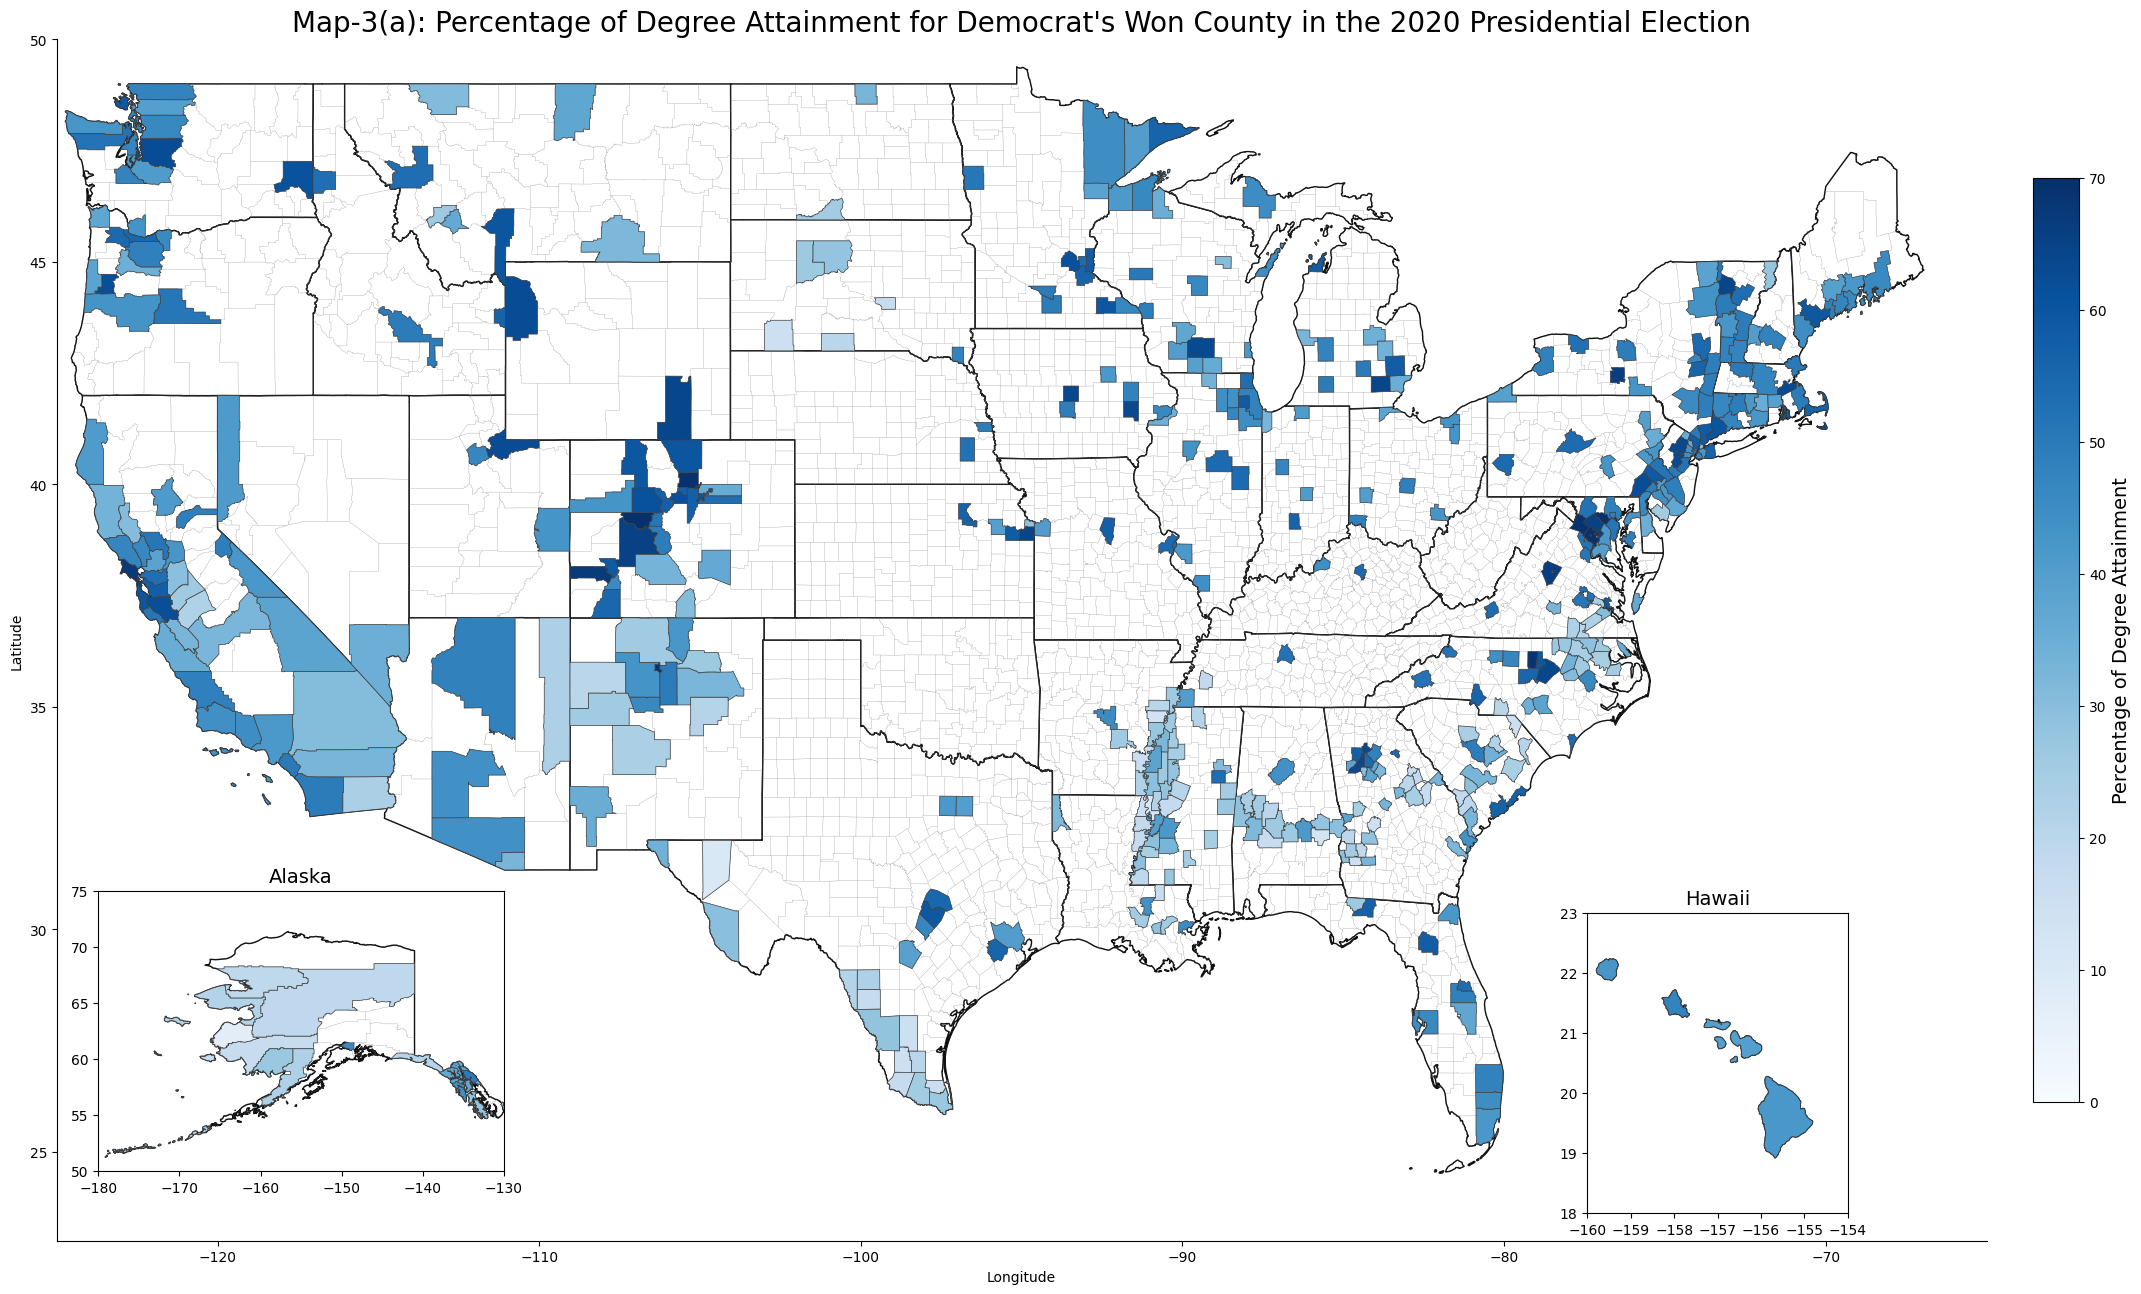

In [195]:
# Map-3(a): Percentage of Degree Attainment for Democrat's Won County in the 2020 Presidential Election

# Demorat only
county_map_dem_df = county_map_df.loc[county_map_df['party'] == 'Democrat'].copy()

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="gray", color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="gray", color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot continental
county_map_dem_df.plot(
    ax=gax, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)
# Plot Hawaii
county_map_dem_df.plot(
    ax=ax_inset_hawaii, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)
# Plot Alaska
county_map_dem_df.plot(
    ax=ax_inset_alaska, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title("Map-3(a): Percentage of Degree Attainment for Democrat's Won County in the 2020 Presidential Election", fontsize=20)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0.0, vmax=70))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.4, pad=0.02)
cbar.set_label('Percentage of Degree Attainment', fontsize=14)

# legend position and font size
#gax.legend(bbox_to_anchor=(0.1, 1.0), ncol=3, fontsize='medium')

#gax.annotate('Republican vs Demorcat Vote Share',xy=(-66, 24.5), fontsize=14)

#gax.set_axis_off()

# Display the map
plt.show()


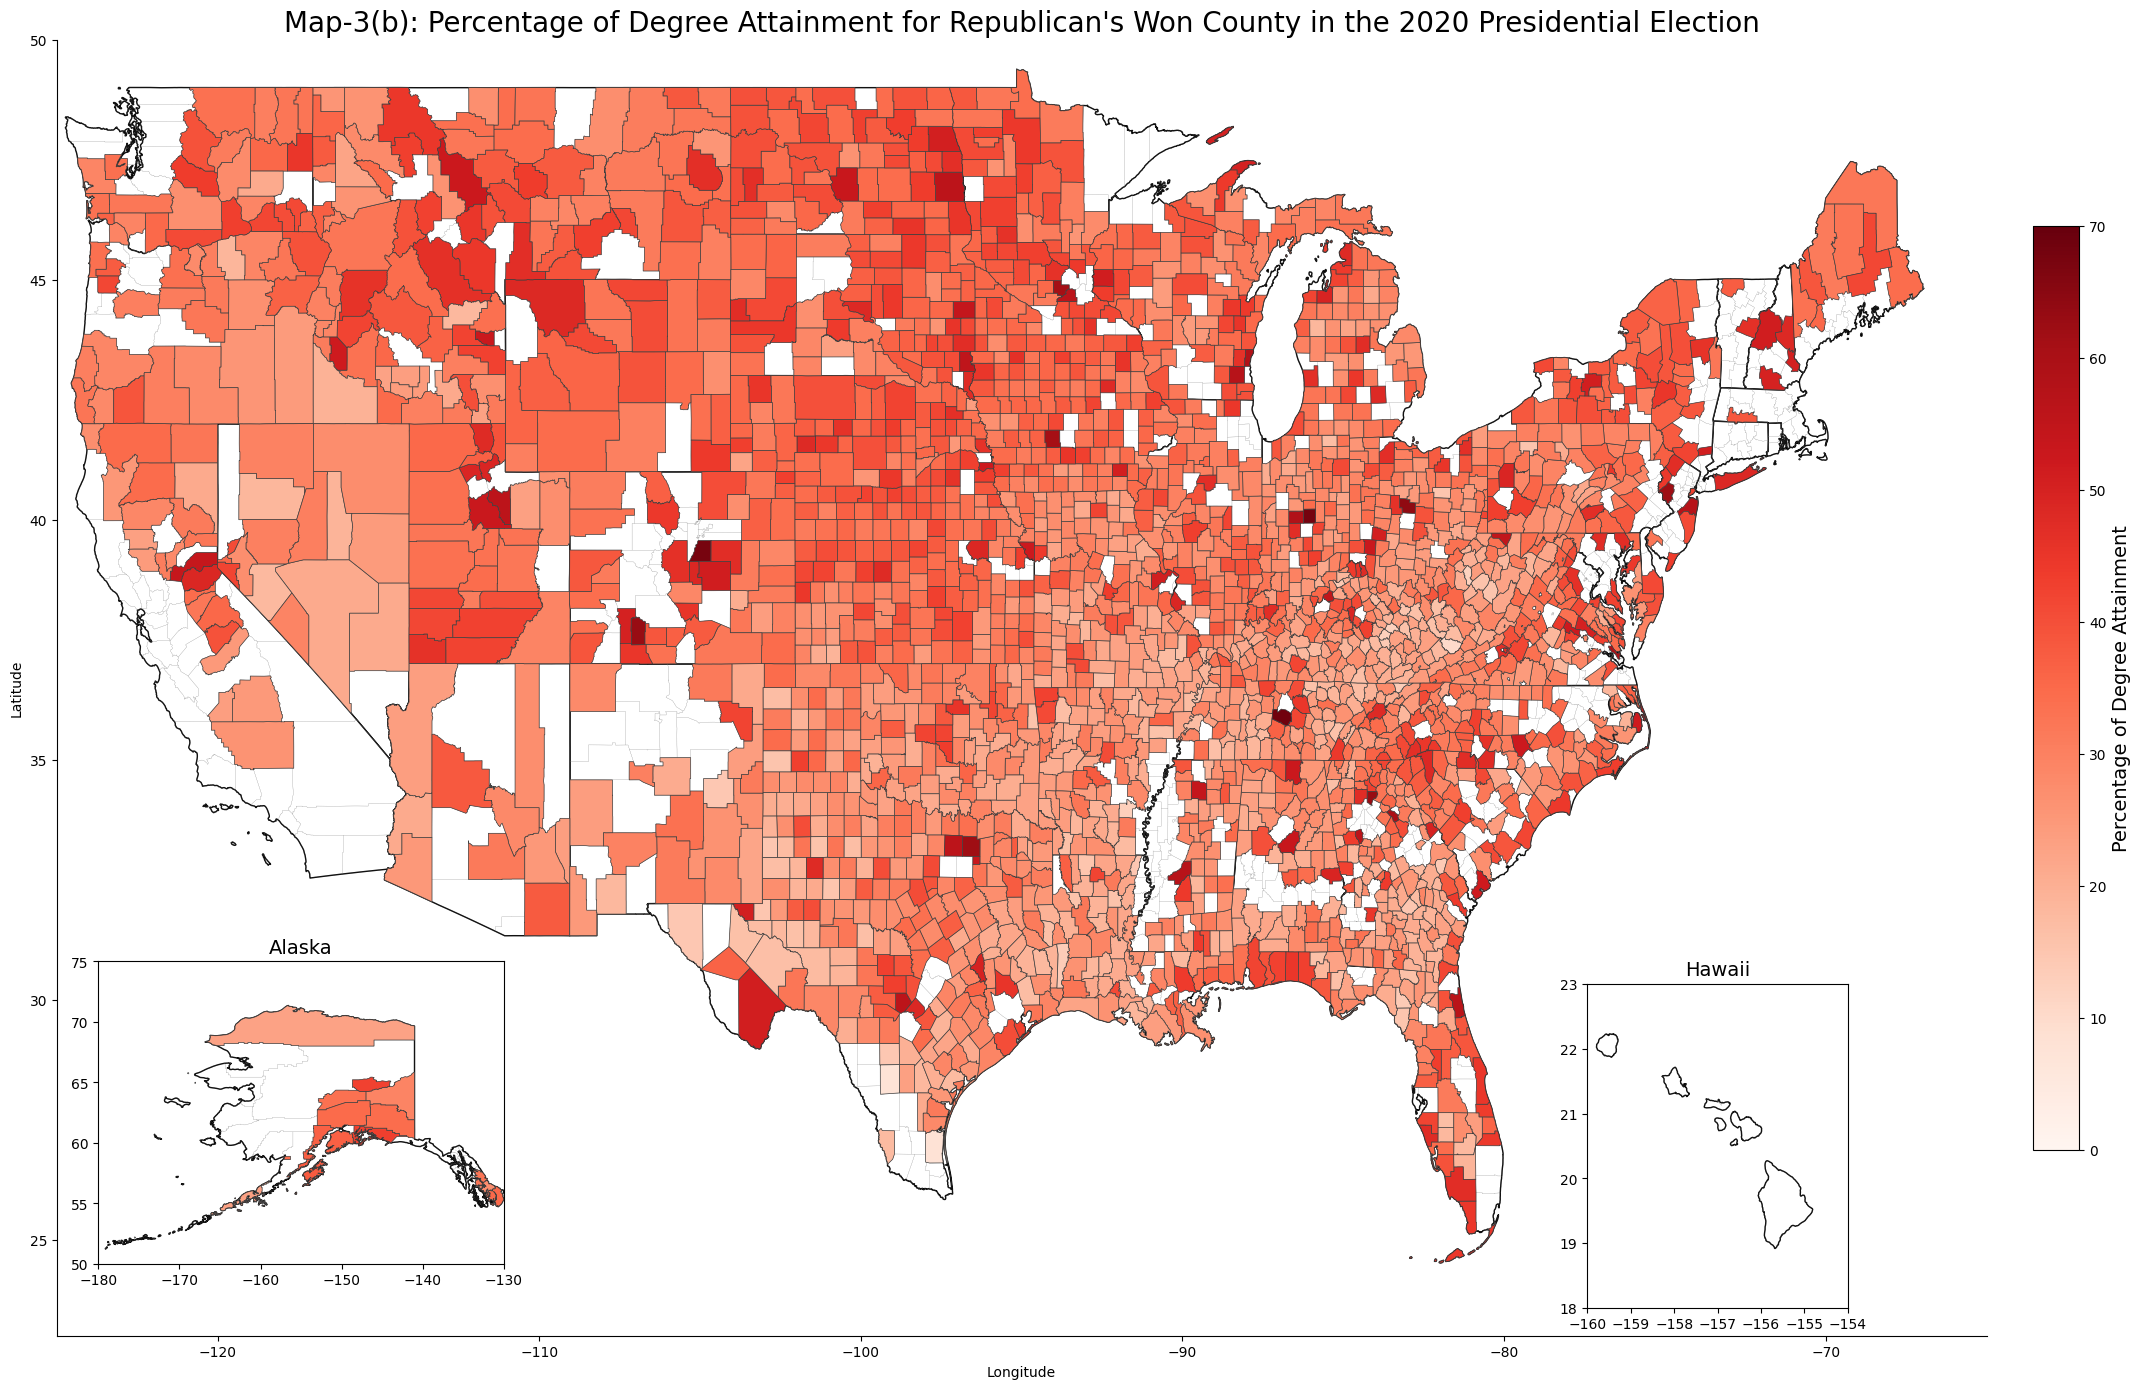

In [196]:
# Map-3(b): Percentage of Degree Attainment for Republican's Won County in the 2020 Presidential Election

# Republican only
county_map_rep_df = county_map_df.loc[county_map_df['party'] == 'Republican'].copy()

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="gray", color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="gray", color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot continental
county_map_rep_df.plot(
    ax=gax, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)
# Plot Hawaii
county_map_rep_df.plot(
    ax=ax_inset_hawaii, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)
# Plot Alaska
county_map_rep_df.plot(
    ax=ax_inset_alaska, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title("Map-3(b): Percentage of Degree Attainment for Republican's Won County in the 2020 Presidential Election", fontsize=20)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0.0, vmax=70))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.4, pad=0.02)
cbar.set_label('Percentage of Degree Attainment', fontsize=14)

# legend position and font size
#gax.legend(bbox_to_anchor=(0.1, 1.0), ncol=3, fontsize='medium')

#gax.annotate('Republican vs Demorcat Vote Share',xy=(-66, 24.5), fontsize=14)

#gax.set_axis_off()

# Display the map
plt.show()


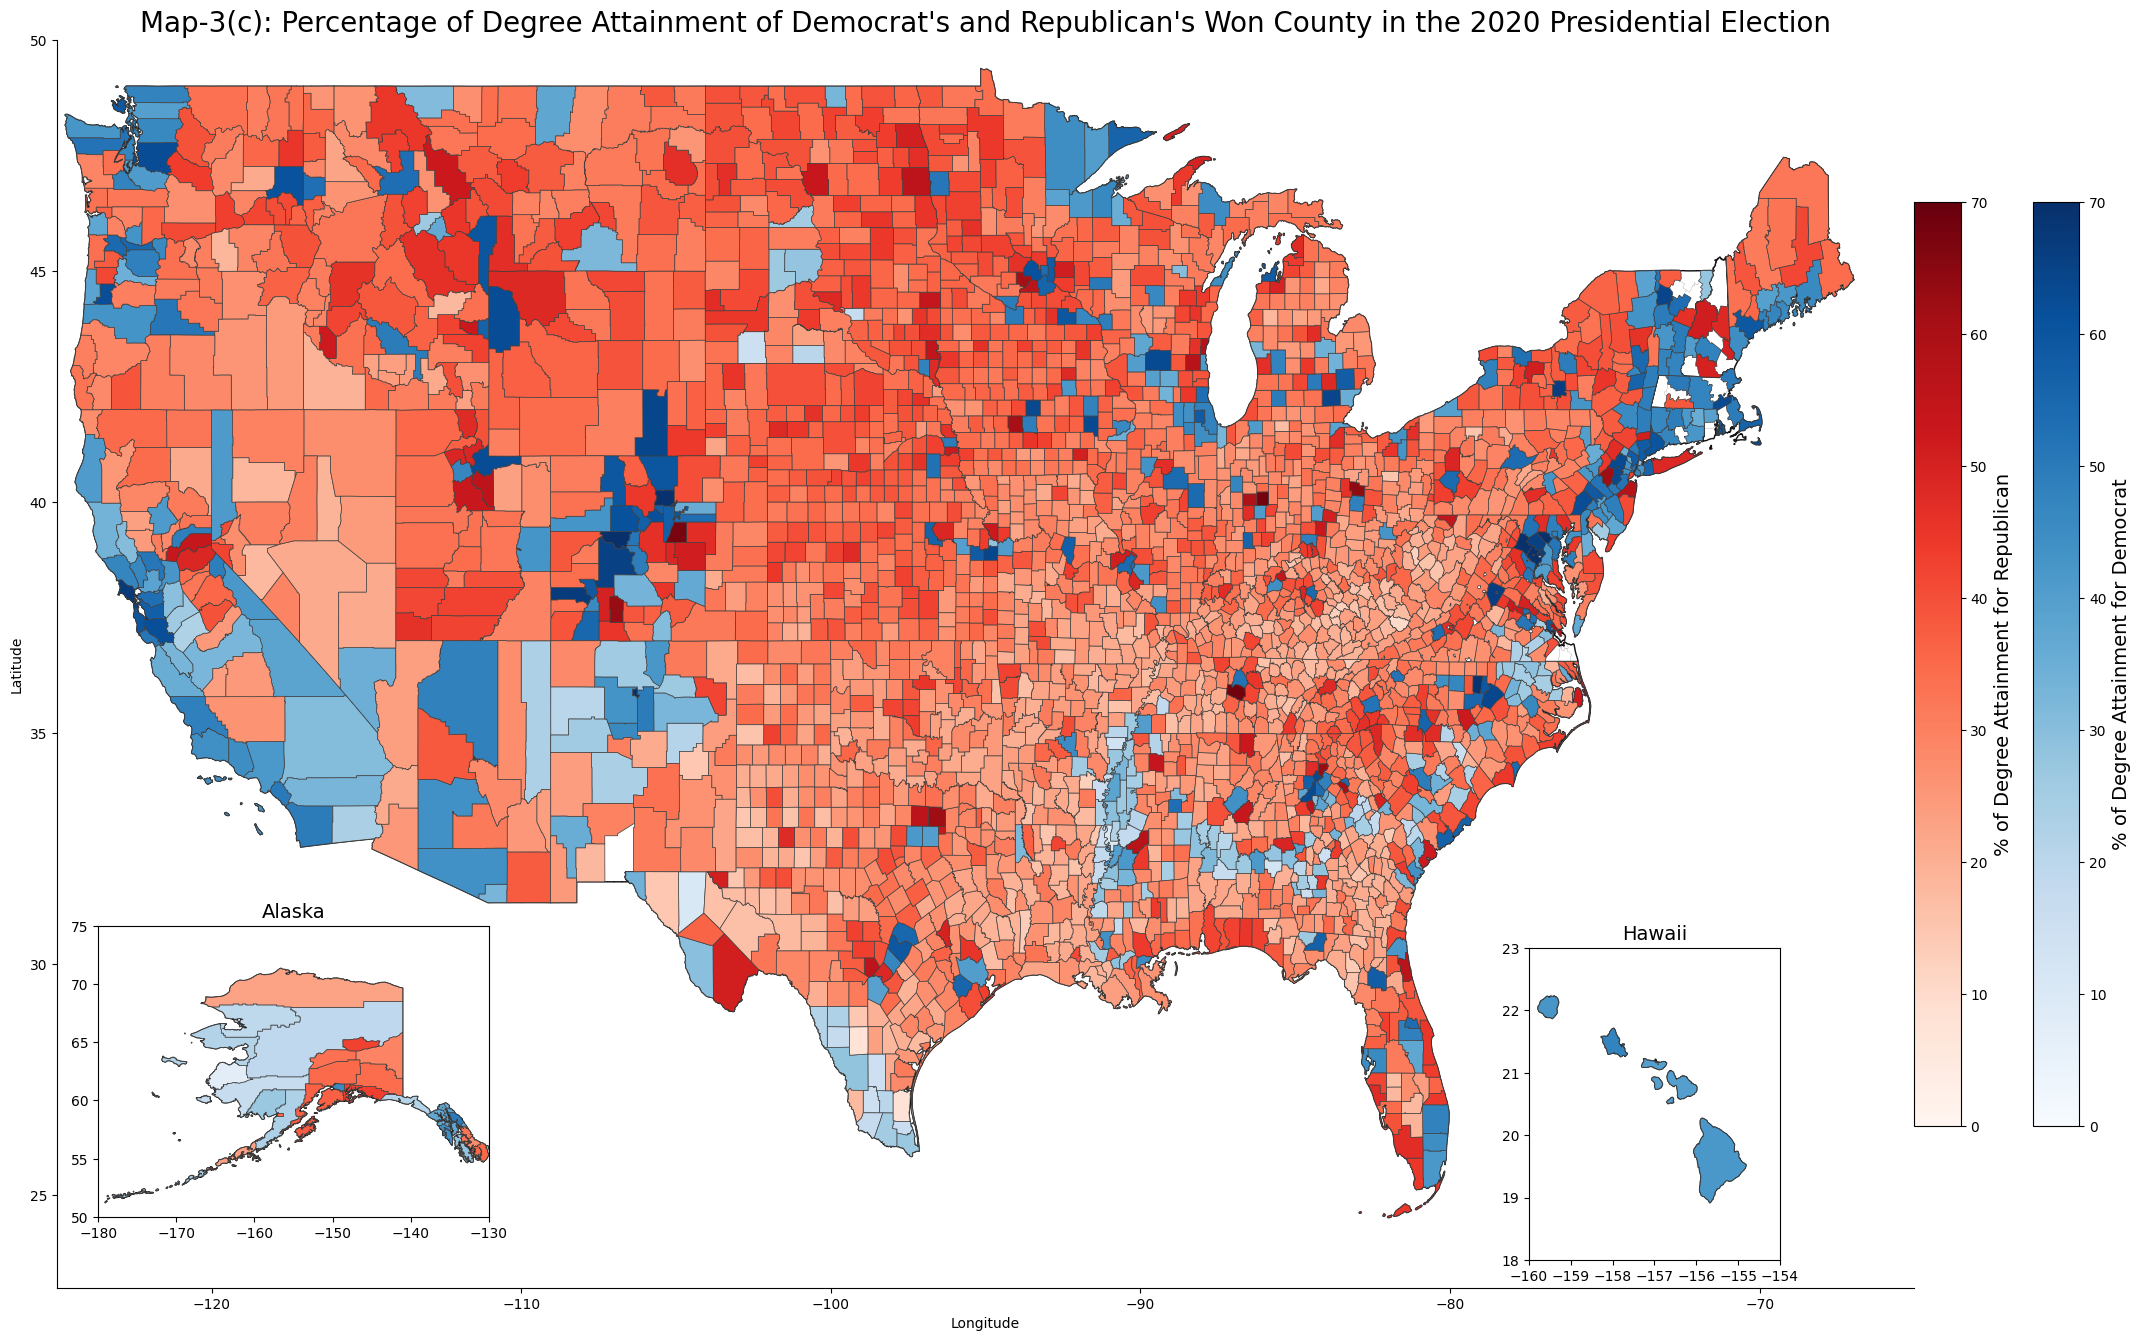

In [197]:
# Map-3(c): Percentage of Degree Attainment of Democrat's and Republican's Won County in the 2020 Presidential Election

# Demorat only
county_map_dem_df = county_map_df.loc[county_map_df['party'] == 'Democrat'].copy()
# Republican
county_map_rep_df = county_map_df.loc[county_map_df['party'] == 'Republican'].copy()

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="gray", color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="gray", color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot Democrat
# Plot continental
county_map_dem_df.plot(
    ax=gax, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)
# Plot Hawaii
county_map_dem_df.plot(
    ax=ax_inset_hawaii, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)
# Plot Alaska
county_map_dem_df.plot(
    ax=ax_inset_alaska, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)


# Plot Republican
# Plot continental
county_map_rep_df.plot(
    ax=gax, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)
# Plot Hawaii
county_map_rep_df.plot(
    ax=ax_inset_hawaii, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)
# Plot Alaska
county_map_rep_df.plot(
    ax=ax_inset_alaska, edgecolor='#404040', column='Degree_Or_Higher_Percentage', legend=False, 
    linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)



gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title("Map-3(c): Percentage of Degree Attainment of Democrat's and Republican's Won County in the 2020 Presidential Election", fontsize=20)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Add a single color legend for the entire plot
sm1 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0.0, vmax=70))
sm1._A = []  # Fake up the array of the scalar mappable
cbar2 = fig.colorbar(sm1, ax=gax, shrink=0.4, pad=-0.09)
cbar2.set_label('% of Degree Attainment for Democrat', fontsize=14)

# Add a single color legend for the entire plot
sm2 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0.0, vmax=70))
sm2._A = []  # Fake up the array of the scalar mappable
cbar2 = fig.colorbar(sm2, ax=gax, shrink=0.4, pad=0.0)
cbar2.set_label('% of Degree Attainment for Republican', fontsize=14)


# legend position and font size
#gax.legend(bbox_to_anchor=(0.1, 1.0), ncol=3, fontsize='medium')

#gax.annotate('Republican vs Demorcat Vote Share',xy=(-66, 24.5), fontsize=14)

#gax.set_axis_off()

# Display the map
plt.show()


### Map-4: Won Share by County on Income Level in the 2020 Presidential Election

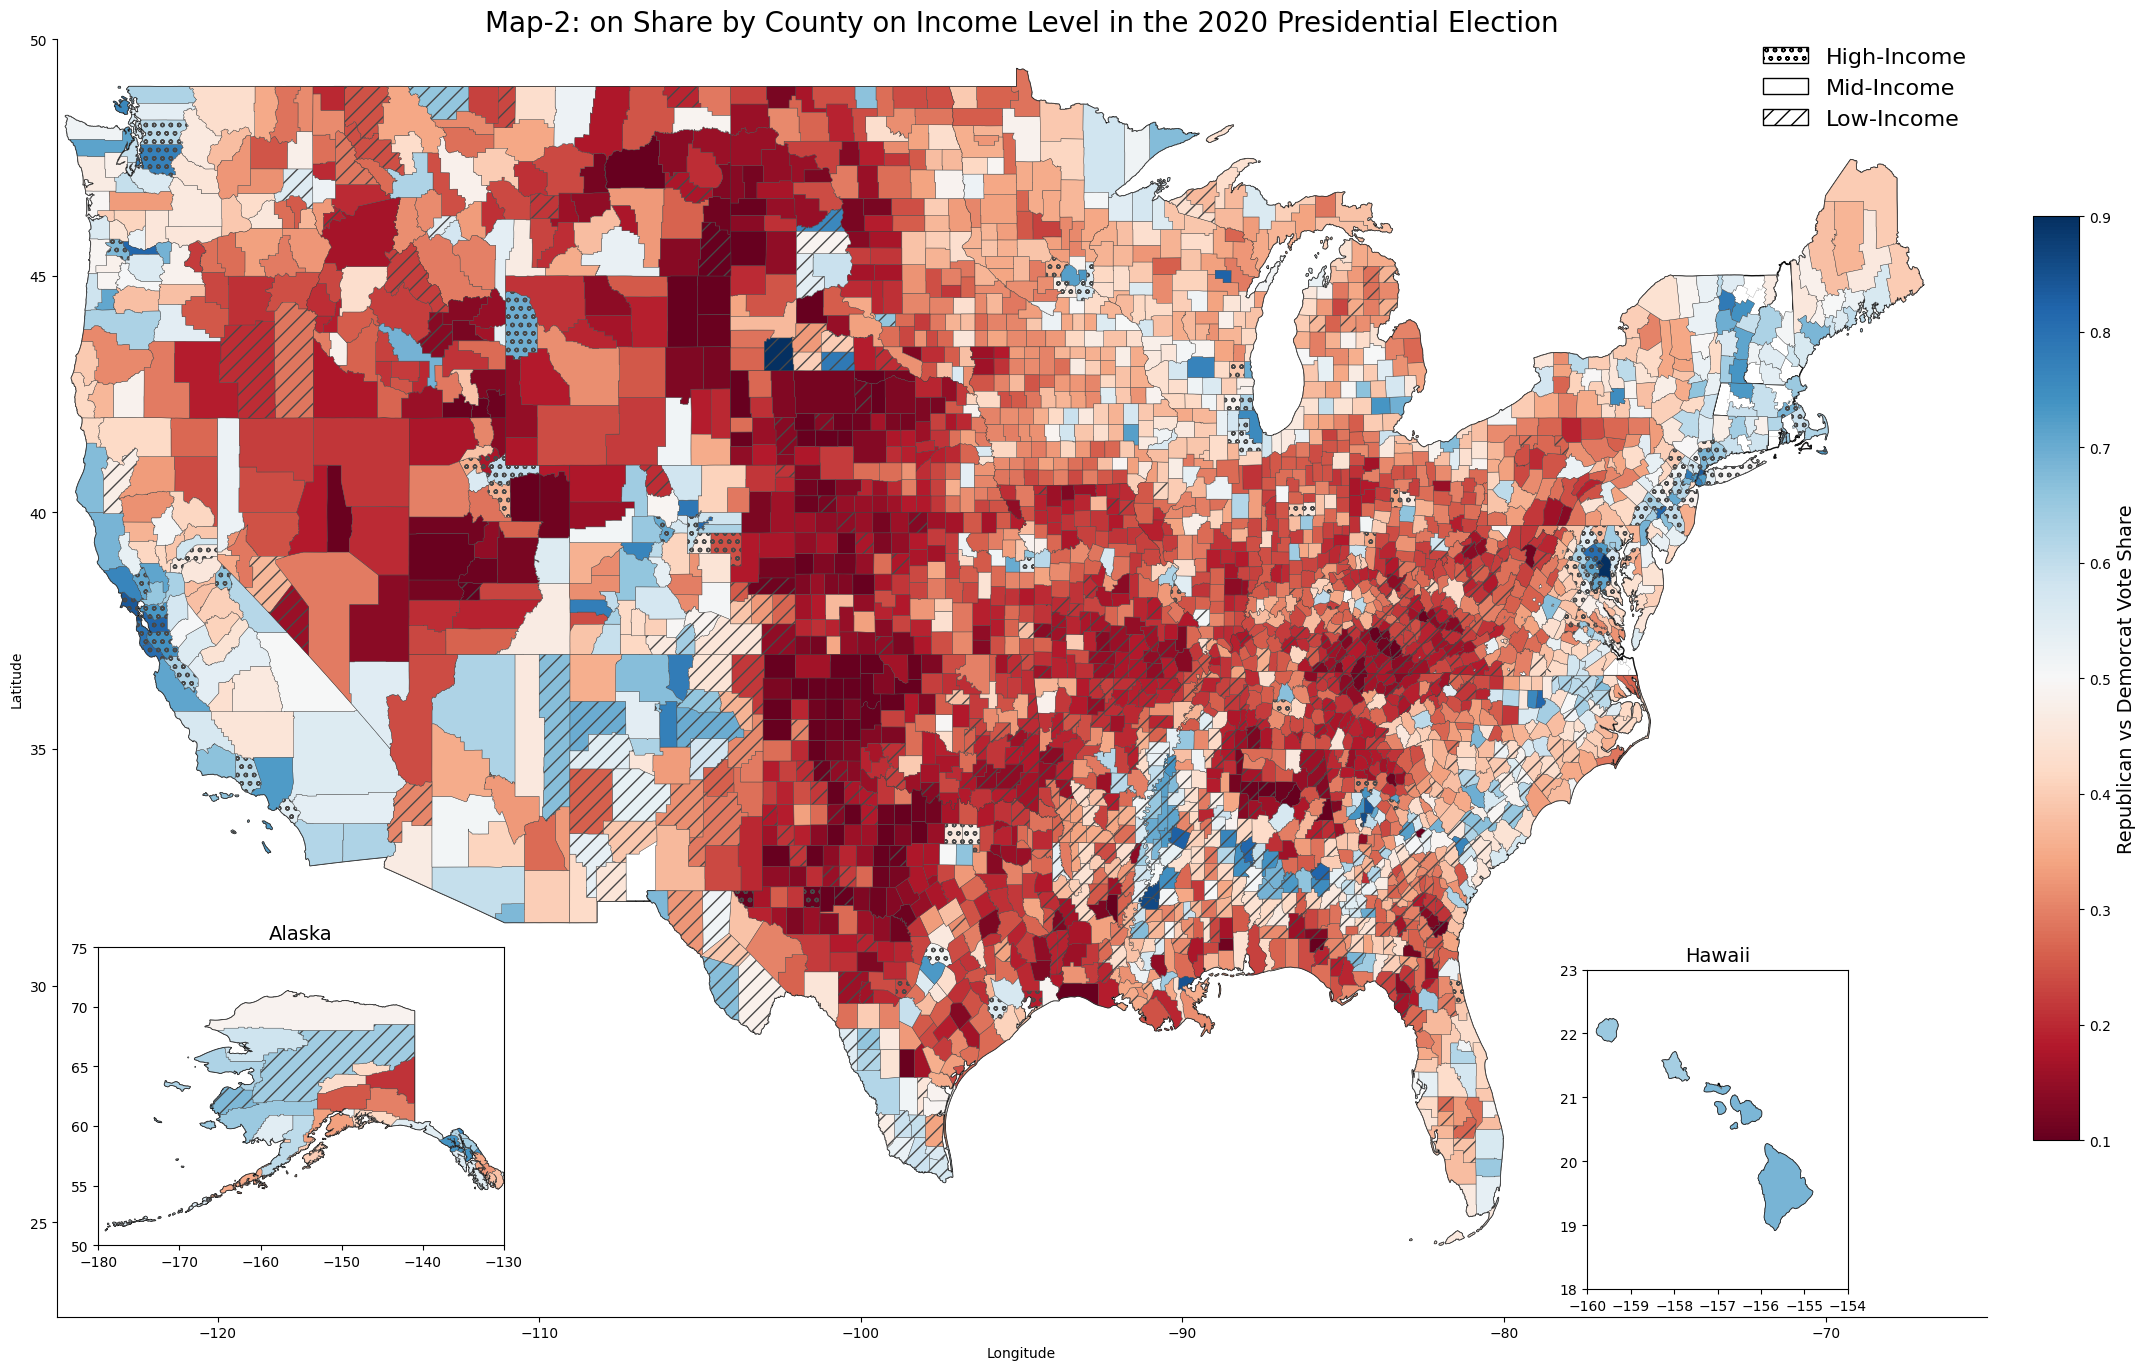

In [198]:
#Map-4: Won Share by County on Income Level in the 2020 Presidential Election

# Define custom pattern for each type
income_pattern = {
    "High-Income": "oo", 
    "Mid-Income": "",
    "Low-Income": "//"
}
# Add 'income_pattern' column to the GeoDataFrame
county_map_df['income_pattern'] = county_map_df['Income_Type'].map(lambda x: income_pattern.get(x, ''))

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="black", color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="black", color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot continental 
for income_type, pattern in income_pattern.items():
    sub_income = county_map_df[county_map_df['Income_Type'] == income_type]
    # Plot continental 
    sub_income.plot(
        ax=gax, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
        cmap='RdBu', vmin=0.1, vmax=0.9,
        linewidth=0.3, hatch=pattern
    )
    # Plot Hawaii
    sub_income.plot(
            ax=ax_inset_hawaii, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
            cmap='RdBu', vmin=0.1, vmax=0.9,
            linewidth=0.3, hatch=pattern
    )
    # Plot Alaska
    sub_income.plot(
            ax=ax_inset_alaska, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
            cmap='RdBu', vmin=0.1, vmax=0.9,
            linewidth=0.3, hatch=pattern
    )

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Map-2: on Share by County on Income Level in the 2020 Presidential Election', fontsize=20)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.4, pad=0.02)
cbar.set_label('Republican vs Demorcat Vote Share', fontsize=14)

# Add a legend for hatch patterns
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch=pattern, label=income_type)
    for income_type, pattern in income_pattern.items()
]
hatch_legend = gax.legend(handles=legend_elements, loc='upper right',
          bbox_to_anchor=(1.0, 1.01),  # Move the legend up (y-coordinate > 1)
          frameon=False, # remove borders,
          prop={'size': 16}, fontsize='medium')
hatch_legend.get_title().set_fontsize(14)  # Set the title font size

# legend position and font size
#gax.legend(bbox_to_anchor=(0.1, 1.0), ncol=3, fontsize='medium')

#gax.annotate('Republican vs Demorcat Vote share',xy=(-65, 23.5), fontsize='medium')

#gax.set_axis_off()

# Display the map
plt.show()


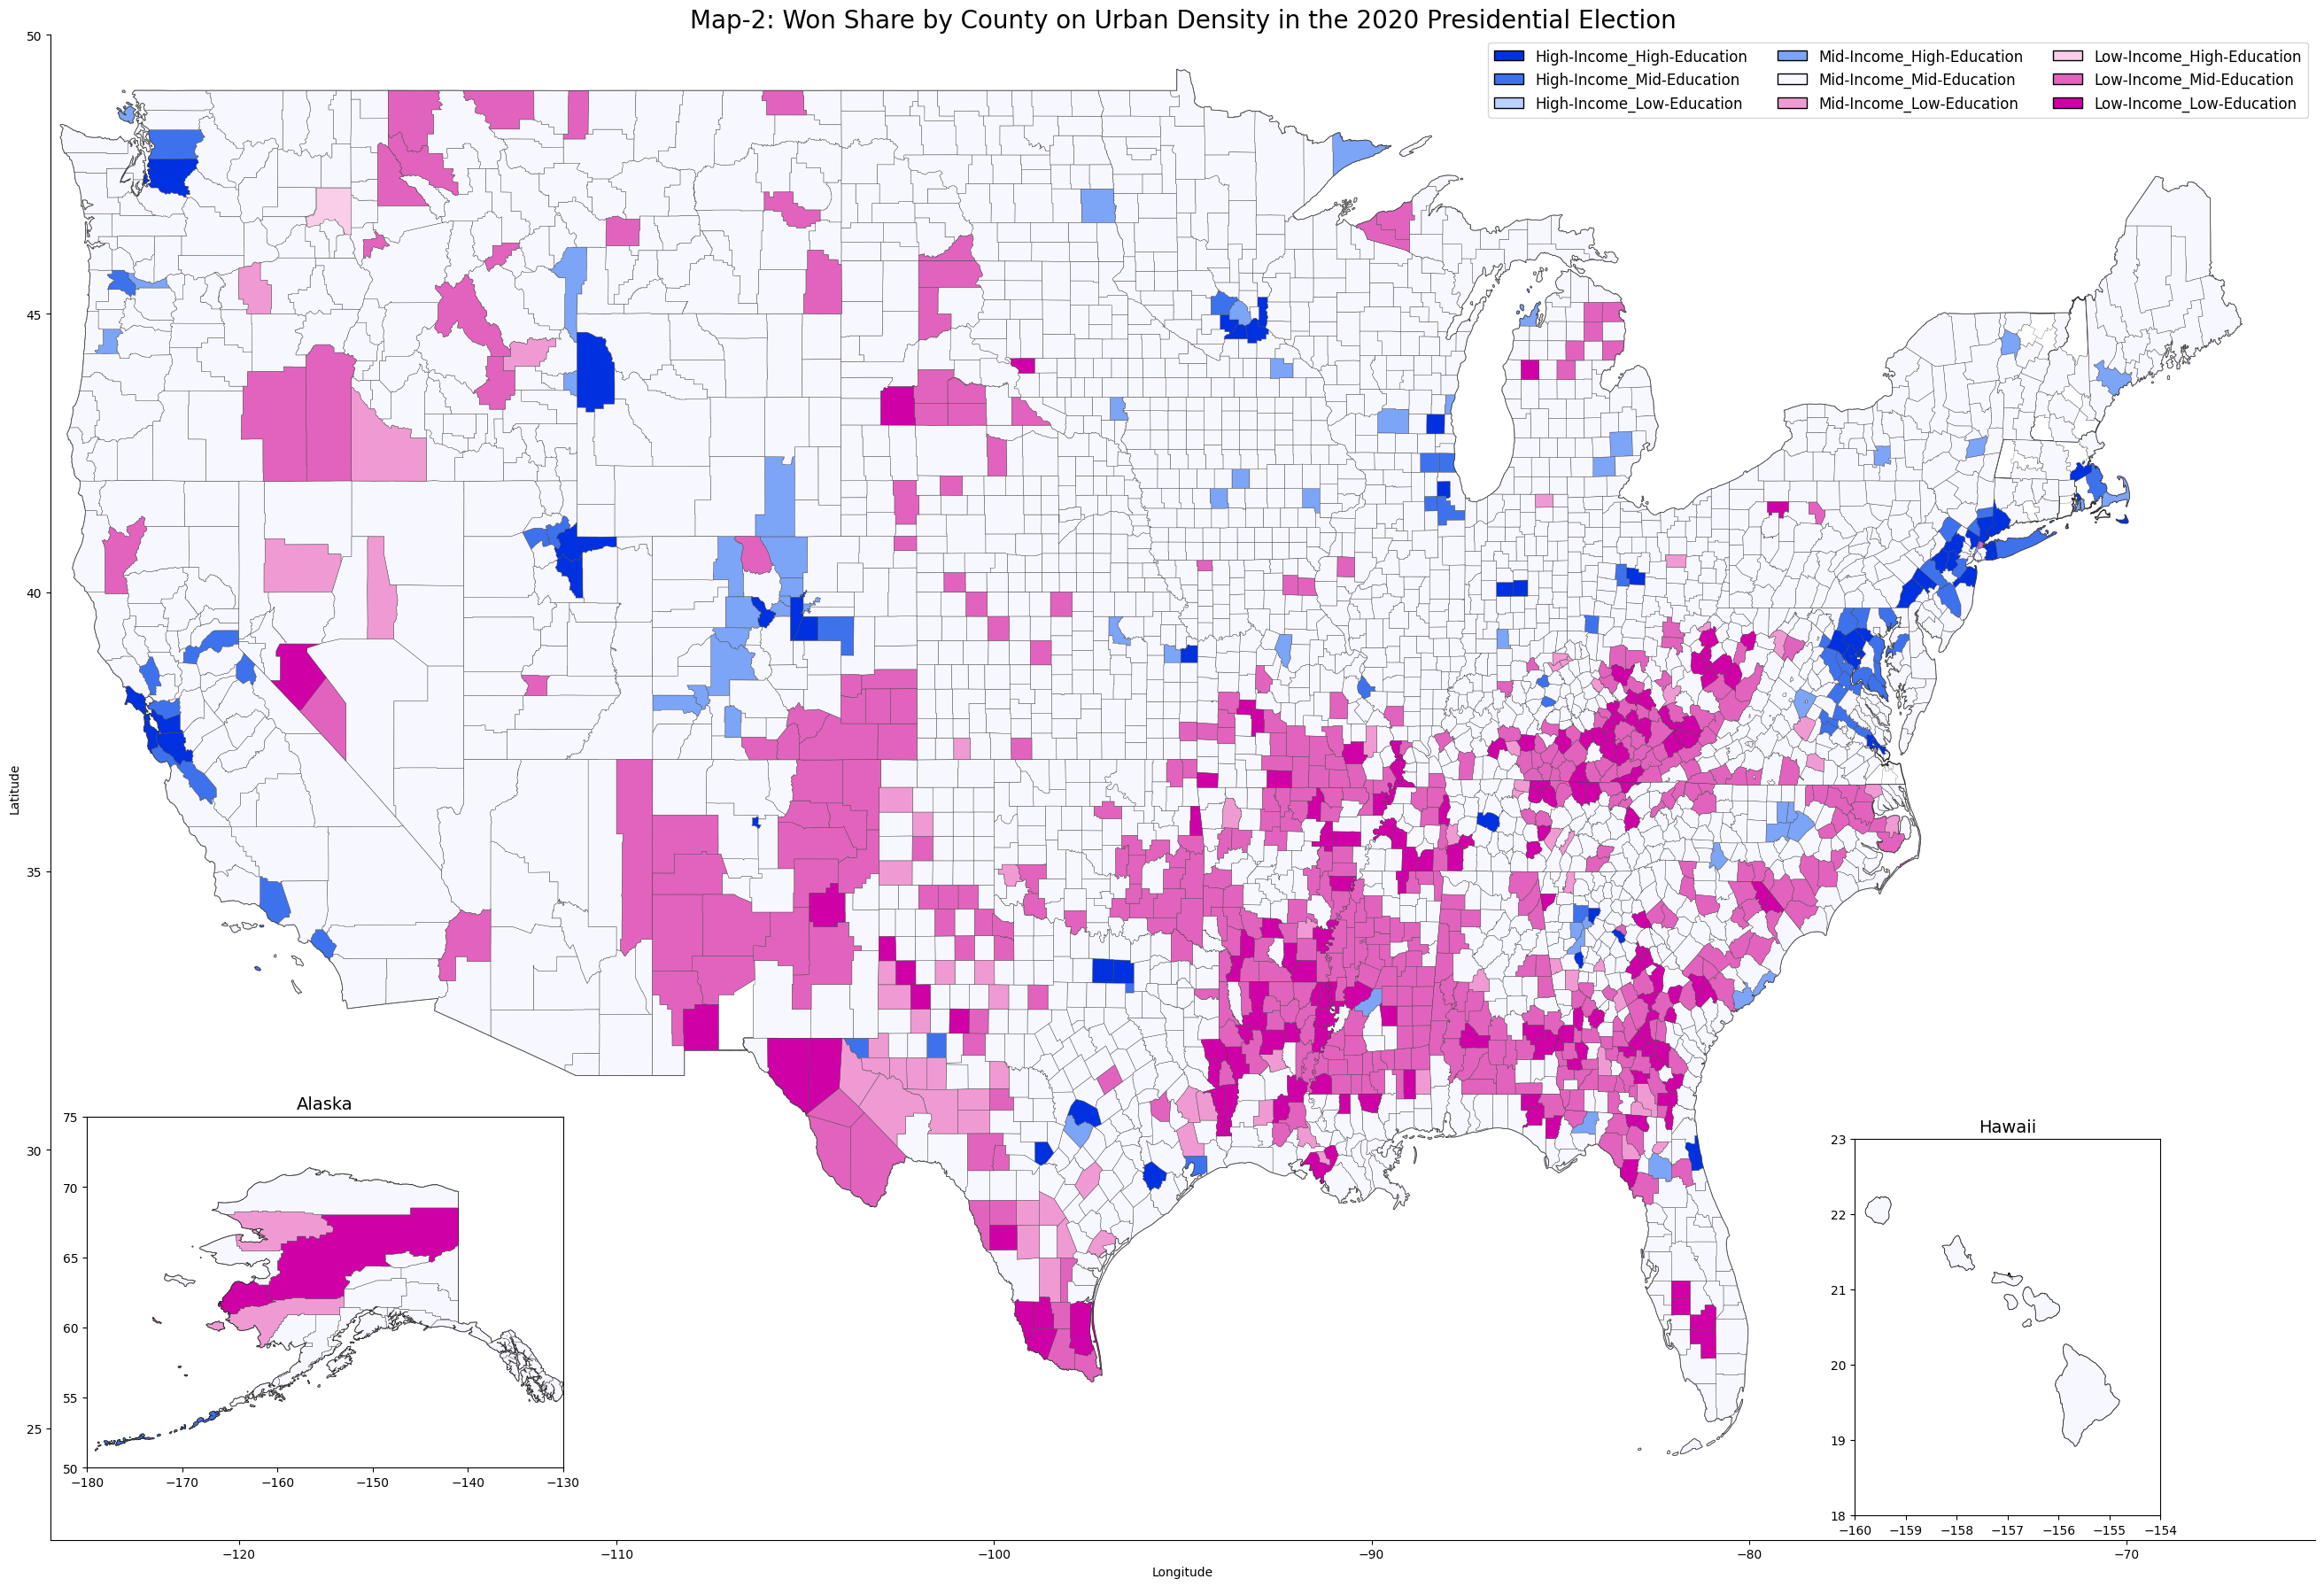

In [206]:
# Map-5: Degree Attainment Level and Urban Density in the 2020 Presidential Election

# Define custom colors map
# Blue to Purple
colors_map = {
    'High-Income_High-Education': '#0031e0',
    'High-Income_Mid-Education': '#3e72ed',
    'High-Income_Low-Education': '#bcd2fd',
    'Mid-Income_High-Education': '#7ca4f7',
    'Mid-Income_Mid-Education': '#f7f7ff',
    'Mid-Income_Low-Education': '#f09ad4',
    'Low-Income_High-Education': '#facde9',
    'Low-Income_Mid-Education': '#e263be',
    'Low-Income_Low-Education': '#d000a7',
}



# Green Mint
#colors_map = {
#    'High-Income_High-Education': '#006400',
#    'High-Income_Mid-Education': '#228b22',
#    'Mid-Income_High-Education': '#004c4c',
#    'High-Income_Low-Education': '#e0ffff',
#    'Mid-Income_Mid-Education': '#40e0d0',
#    'Low-Income_High-Education': '#004d4d',
#    'Mid-Income_Low-Education': '#b2e6b2',
#    'Low-Income_Mid-Education': '#008080',
#    'Low-Income_Low-Education': '#98ff98',
#}


# Green
#colors_map = {
#    'High-Income_High-Education': '#0d6986',
#    'High-Income_Mid-Education': '#347993',
#    'High-Income_Low-Education': '#6999ae',
#    'Mid-Income_High-Education': '#5089a0',
#    'Mid-Income_Mid-Education': '#9bbbc8',
#    'Mid-Income_Low-Education': '#b3cbd6',
#    'Low-Income_High-Education': '#82aabb',
#    'Low-Income_Mid-Education': '#ccdce4',
#    'Low-Income_Low-Education': '#e6eef1',
#}


# Green Mint
#colors_map = {
#    'High-Income_High-Education': '#006400',
#    'High-Income_Mid-Education': '#228b22',
#    'Mid-Income_High-Education': '#004c4c',
#    'High-Income_Low-Education': '#e0ffff',
#    'Mid-Income_Mid-Education': '#40e0d0',
#    'Low-Income_High-Education': '#004d4d',
#    'Mid-Income_Low-Education': '#b2e6b2',
#    'Low-Income_Mid-Education': '#008080',
#    'Low-Income_Low-Education': '#98ff98',
#}

# Blue to Purple
#colors_map = {
#    'High-Income_High-Education': '#0031e0',
#    'High-Income_Mid-Education': '#3e72ed',
#    'Mid-Income_High-Education': '#7ca4f7',
#    'High-Income_Low-Education': '#bcd2fd',
#    'Mid-Income_Mid-Education': '#ffffff',
#    'Low-Income_High-Education': '#facde9',
#    'Mid-Income_Low-Education': '#f09ad4',
#    'Low-Income_Mid-Education': '#e263be',
#    'Low-Income_Low-Education': '#d000a7',
#}

# Blue to Red
#colors_map = {
#    'High-Income_High-Education': '##0031e0',
#    'High-Income_Mid-Education': '##3e72ed',
#    'High-Income_Low-Education': '##7ca4f7',
#    'Mid-Income_High-Education': '##bcd2fd',
#    'Mid-Income_Mid-Education': '#ffffff',
#    'Mid-Income_Low-Education': '##ffcec5',
#    'Low-Income_High-Education': '##fb9b8d',
#    'Low-Income_Mid-Education': '##f06554',
#    'Low-Income_Low-Education': '##e00000',
#}
# Add 'Income_Education_Type' column
county_map_df['Income_Education_Type'] = county_map_df['Income_Type'] + "_" + county_map_df['Education_Type']

# Create a larger figure
fig, gax = plt.subplots(figsize=(33, 30))  # Increased figure size for overall map

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="#303030", color="white")
counties_df.plot(ax=gax, edgecolor="#303030", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="black", color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="black", color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)


# Plot continental 
for income_education_type, ie_color in colors_map.items():
    sub_type = county_map_df[county_map_df['Income_Education_Type'] == income_education_type]
    count = sub_type['Income_Education_Type'].count()
    if count > 0:
        # Plot continental 
        sub_type.plot(
                ax=gax, edgecolor='#484848', legend=False, color=ie_color, linewidth=0.3
        )
        # Plot Hawaii
        sub_type.plot(
                ax=ax_inset_hawaii, edgecolor='#484848', legend=False, color=ie_color, linewidth=0.3
        )
        # Plot Alaska
        sub_type.plot(
                ax=ax_inset_alaska, edgecolor='#484848', legend=False, color=ie_color, linewidth=0.3
        )



gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Map-5: Degree Attainment Level and Urban Density in the 2020 Presidential Election', fontsize=20)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Create legend
legend_elements = [Patch(facecolor=color, edgecolor='black', label=label) 
                   for label, color in colors_map.items()]

# Add legend to the plot
gax.legend(handles=legend_elements, bbox_to_anchor=(1.0, 1.0), ncol=3, fontsize='12')


# legend position and font size
#gax.legend(bbox_to_anchor=(0.1, 1.0), ncol=3, fontsize='medium')

#gax.annotate('Republican vs Demorcat Vote share',xy=(-65, 23.5), fontsize='medium')

#gax.set_axis_off()

# Display the map
plt.show()


## Regressions

In [161]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import qeds
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [162]:
# Load and prepare data

# load president_county_candidate.csv
president_county_cand = pd.read_csv('../Data/president_county_candidate.csv')

# load alaska_president_county_candidate.csv
alaska_president_county_cand = pd.read_csv('../Data/alaska_president_county_candidate.csv')

# load maine_president_county_candidate.csv
maine_president_county_cand = pd.read_csv('../Data/maine_president_county_candidate.csv')

# load US_Election_dataset_v1.csv
us_election = pd.read_csv("../Data/US_Election_dataset_v1.csv")

# data cleaning: president_county_cand
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
# clean up Alaska records
# remove alaska records
president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'ALASKA' ]
# add mapped alaska records to president_county_cand
president_county_cand = pd.concat([president_county_cand, alaska_president_county_cand])
# clean up Maine records
# remove maine records
president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'MAINE' ]
# add mapped maine records to president_county_cand
president_county_cand = pd.concat([president_county_cand, maine_president_county_cand])

# president_county_cand_won: filter in won is True
president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
#president_county_cand_won

# col 'party'
#party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
#president_county_cand['party'] = president_county_cand['party'].map(
#    lambda x: party_dict.get(x, 'Third-Party'))
# president_county_cand_won: filter in won is True
#president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
#president_county_cand_won

# data cleaning: us_election
us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
us_election['state'] = us_election['state'].str.upper()
us_election['state'] = us_election['state'].str.strip()
# col 'County Name'
us_election['county'] = us_election['county'].str.upper()
us_election['county'] = us_election['county'].str.strip()
us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
us_election['county'] = us_election['county'].str.replace(" CENSUS AREA", "")
us_election['county'] = us_election['county'].str.replace(" CITY AND BOROUGH", "")
us_election['county'] = us_election['county'].str.replace(" BOROUGH", "")
us_election['county'] = us_election['county'].str.replace(" MUNICIPALITY", "")


################################################################################

# Update party and Party_Index
# president_county_cand: prepare columns
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
party_map = {'DEM': 0.0, 'REP': 1.0}
president_county_cand['Party_Index'] = president_county_cand['party'].map(party_map)
president_county_cand['party'] = president_county_cand['party'].map(
    lambda x: party_dict.get(x, 'Third-Party'))

# president_county_cand_won: prepare columns
president_county_cand_won['Party_Index'] = president_county_cand_won['party']. \
                                           map(party_map)
president_county_cand_won['party'] = president_county_cand_won['party']. \
                                     map(lambda x: party_dict.get(x, 'Third-Party'))
#print(president_county_cand_won.head())

# senate_county_cand_won: prepare columns
#senate_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in \
#                                         senate_county_cand_won['party']]
#senate_county_cand_won['party'] = senate_county_cand_won['party']. \
#                                  map(lambda x: party_dict.get(x, 'Third-Party'))
#print(senate_county_cand_won.head())

# governor_county_cand_won: prepare columns
#governor_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in \
#                                           governor_county_cand_won['party']]
#governor_county_cand_won['party'] = governor_county_cand_won['party']. \
#                                    map(lambda x: party_dict.get(x, 'Third-Party'))
#print(governor_county_cand_won.head())

# house_cand_won: prepare columns
#house_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in house_cand_won['party']]
#house_cand_won['party'] = house_cand_won['party']. \
#                                map(lambda x: party_dict.get(x, 'Third-Party'))
#print(house_cand_won.head())




In [163]:
# Prepare necessary columns

# us_election: clean data and prepare new columns
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
us_election['Median_Income'] = us_election['Median_Income'].div(1000.0)
us_election['Won_Vote'] = us_election[["2020 Democrat vote raw", \
                          "2020 Republican vote raw","2020 other vote raw"]].max(axis=1)
us_election['Total_Vote'] = us_election["2020 Democrat vote raw"] + \
                            us_election["2020 Republican vote raw"] + \
                            us_election["2020 other vote raw"]
us_election['Vote_Percentage'] = (us_election["Won_Vote"] / us_election["Total_Vote"]) * 100
us_election['Degree_Or_Higher_Percentage'] = \
        us_election["Associates Degree"].str.rstrip('%').astype('float') + \
        us_election["Bachelors Degree"].str.rstrip('%').astype('float') + \
        us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
us_election['Race_Index'] = np.where(us_election['NH-White percentage'] >= 50, 1.0, 0.0)                             
us_election['DEM_Vote_Percentage'] = us_election["2020 Democrat vote raw"] / \
                                     (us_election["2020 Republican vote raw"] + \
                                     us_election["2020 Democrat vote raw"] + \
                                     us_election["2020 other vote raw"])
us_election['REP_Vote_Percentage'] = us_election["2020 Republican vote raw"] / \
                                     (us_election["2020 Republican vote raw"] + \
                                     us_election["2020 Democrat vote raw"] + \
                                     us_election["2020 other vote raw"])

# Define the function to categorize population density
def categorize_pop_density(density):
    if density < 39: 
        return 'Rural'
    elif density >= 39 and density <= 193:
        return 'Sub-Urban'
    else:
        return 'Urban'
us_election['Area_Type'] = us_election['Density per square km'].apply(categorize_pop_density)
us_election['Density_Per_Sq_Km_Log'] = np.log(us_election['Density per square km']) 
us_election['Density_Per_Sq_Km_Log'] = us_election['Density_Per_Sq_Km_Log'].apply(lambda x: 0.0001 if x < 0 else x)
#us_election['Density_Per_Sq_Km_Log'] = us_election['Density per square km'] / 100

# Define the function to categorize total population
#def categorize_total_population(population):
#    if population < 50000: 
#        return 1
#    elif population >= 5000 and population < 250000:
#        return 2
#    elif population >= 250000 and population < 500000:
#        return 3
#    elif population >= 500000 and population < 1000000:
#        return 4
#    elif population > 1000000:
#        return 5
#us_election['Population_Index'] = us_election['Total Population'].apply(categorize_total_population)
#us_election['Population_Log'] = np.log(us_election['Total Population'] * 10)
us_election['Population'] = us_election['Total Population'] / 1000
area_index_map = {'Rural': 0, 'Sub-Urban': 1, 'Urban': 2}
us_election['Area_Index'] = us_election['Area_Type'].map(area_index_map)
us_election['Urban'] = us_election['Area_Type'].apply(lambda x: 1 if x == 'Urban' else 0)


#us_election['Median_Income_Adjusted'] = us_election['Median_Income']
#us_election['Median_Income_Adjusted'] = us_election['Median_Income'] / 1000 # in k
#us_election['Median_Income_Adjusted'] = np.log(us_election['Median_Income'])

us_election['White_Proportion'] = us_election['NH-White percentage'] /100
us_election['Degree_Or_Higher_Proportion'] = us_election['Degree_Or_Higher_Percentage'] / 100

#us_election.rename(columns={"Percentage engaged in Management, business, science, and arts occupations": "Occupation_Mgmt_Business", 
#                            "Percentage engaged in Resources and Construction": "Occupation_Resources_Construction"}, 
#                   inplace=True)

us_election['Occupation_Mgmt_Business'] = us_election['Percentage engaged in Management, business, science, and arts occupations'] / 100
us_election['Occupation_Resources_Construction'] = us_election['Percentage engaged in Resources and Construction'] / 100

# Dummy variable
president_county_cand_won['DEMOCRAT'] = president_county_cand_won['party'].apply(lambda x: 1 if x == 'Democrat' else 0)
president_county_cand_won['REPUBLICAN'] = president_county_cand_won['party'].apply(lambda x: 1 if x == 'Republican' else 0)


# merge datasets
final_df = pd.merge(president_county_cand_won, us_election, \
                    on=['state', 'county'], how="inner")

# merge datasets
#final_df = pd.merge(president_county_cand, us_election, \
#                    on=['state', 'county'], how="inner")

#final_df[final_df['Party_Index'] == 1]

# With dummy variable DEMOCRATE
#final_df['Area_Index_DEMOCRAT'] = final_df['Area_Index'] * final_df['DEMOCRAT']
#final_df['Density_Per_Sq_Km_Log_DEMOCRAT'] = final_df['Density_Per_Sq_Km_Log'] * final_df['DEMOCRAT']
#final_df['Race_Index_DEMOCRAT'] = final_df['Race_Index'] * final_df['DEMOCRAT']
#final_df['White_Proportion_DEMOCRAT'] = final_df['White_Proportion'] * final_df['DEMOCRAT']
#final_df['Median_Income_DEMOCRAT'] = final_df['Median_Income'] * final_df['DEMOCRAT']
#final_df['Population_Log_DEMOCRAT'] = final_df['Population_Log'] * final_df['DEMOCRAT']
#final_df['Degree_Or_Higher_Proportion_DEMOCRAT'] = final_df['Degree_Or_Higher_Proportion'] * final_df['DEMOCRAT']


# With dummy variable Race_Index
final_df['Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion'] = final_df['Density_Per_Sq_Km_Log'] * final_df['Degree_Or_Higher_Proportion']
final_df['Degree_Or_Higher_Proportion_x_Median_Income'] = final_df['Degree_Or_Higher_Proportion'] * final_df['Median_Income']
final_df['Density_Per_Sq_Km_Log_x_Race_Index'] = final_df['Density_Per_Sq_Km_Log'] * final_df['Race_Index']
final_df['Degree_Or_Higher_Proportion_x_Race_Index'] = final_df['Degree_Or_Higher_Proportion'] * final_df['Race_Index']




#final_df['Degree_Or_Higher_Proportion_DEMOCRAT']
#final_df[['party','Population_Log_DEMOCRAT']]



### Regression-1: Y = Democratic Share Vote %


In [164]:
######################################################################
# Regression-1: Y = Democratic Vote Share %
######################################################################

# Create lists of variables to be used in each regression
#Y = reg_df['Vote_Percentage']
Y = final_df['DEM_Vote_Percentage']
X0 = final_df[['Density_Per_Sq_Km_Log']]
X0 = sm.add_constant(X0)
X1 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion']]
X1 = sm.add_constant(X1)
X2 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion']]
X2 = sm.add_constant(X2)
X3 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income']]
X3 = sm.add_constant(X3)
X4 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population']]
X4 = sm.add_constant(X4)
X5 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index']]
X5 = sm.add_constant(X5)

model0 = sm.OLS(Y, X0, missing='drop').fit()
model1 = sm.OLS(Y, X1, missing='drop').fit()
model2 = sm.OLS(Y, X2, missing='drop').fit()
model3 = sm.OLS(Y, X3, missing='drop').fit()
model4 = sm.OLS(Y, X4, missing='drop').fit()
model5 = sm.OLS(Y, X5, missing='drop').fit()

# Display the Regression Results using Stargazer
stargazer = Stargazer([model0, model1, model2, model3, model4, model5])

# Set the same order of variables for all regressions
stargazer.covariate_order(['const', 'Density_Per_Sq_Km_Log', 'White_Proportion', 
                           'Degree_Or_Higher_Proportion', 'Median_Income', 'Population',
                           'Race_Index'])
stargazer.title("Regression-1: Y = Democratic Vote Share %")
stargazer.custom_columns(["Model-0", "Model-1", "model-2", "Model-3", "Model-4", "Model-5"], 
                        [1, 1, 1, 1, 1, 1])

# Output the HTML representation of the regression table
html_output = stargazer.render_html()

# Print the HTML output
from IPython.display import display, HTML
display(HTML(html_output))





### Regression-2: Y = Republican Vote Share %

In [165]:
######################################################################
# Regression-1: Y = Republican Vote Share %
######################################################################

# Create lists of variables to be used in each regression
#Y = reg_df['Vote_Percentage']
Y = final_df['REP_Vote_Percentage']
X0 = final_df[['Density_Per_Sq_Km_Log']]
X0 = sm.add_constant(X0)
X1 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion']]
X1 = sm.add_constant(X1)
X2 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion']]
X2 = sm.add_constant(X2)
X3 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income']]
X3 = sm.add_constant(X3)
X4 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population']]
X4 = sm.add_constant(X4)
X5 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index']]
X5 = sm.add_constant(X5)

model0 = sm.OLS(Y, X0, missing='drop').fit()
model1 = sm.OLS(Y, X1, missing='drop').fit()
model2 = sm.OLS(Y, X2, missing='drop').fit()
model3 = sm.OLS(Y, X3, missing='drop').fit()
model4 = sm.OLS(Y, X4, missing='drop').fit()
model5 = sm.OLS(Y, X5, missing='drop').fit()

# Display the Regression Results using Stargazer
stargazer = Stargazer([model0, model1, model2, model3, model4, model5])

# Set the same order of variables for all regressions
stargazer.covariate_order(['const', 'Density_Per_Sq_Km_Log', 'White_Proportion', 
                           'Degree_Or_Higher_Proportion', 'Median_Income', 'Population',
                           'Race_Index'])
stargazer.title("Regression-1: Y = Republican Vote Share %")
stargazer.custom_columns(["Model-0", "Model-1", "model-2", "Model-3", "Model-4", "Model-5"], 
                        [1, 1, 1, 1, 1, 1])

# Output the HTML representation of the regression table
html_output = stargazer.render_html()

# Print the HTML output
from IPython.display import display, HTML
display(HTML(html_output))





### Regression-3: Y = Democrat Vote Share % + Race Index (dummy variable)

In [178]:
######################################################################
# Regression-3: Y = Democrat Vote Share % + Race Index (dummy variable)
######################################################################

# Create lists of variables to be used in each regression
Y = final_df['DEM_Vote_Percentage']
X0 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index']]
X0 = sm.add_constant(X0)
X1 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income']]
X1 = sm.add_constant(X1)
X2 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion']]
X2 = sm.add_constant(X2)
X3 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
               'Degree_Or_Higher_Proportion_x_Race_Index']]
X3 = sm.add_constant(X3)
X4 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
               'Degree_Or_Higher_Proportion_x_Race_Index',
               'Density_Per_Sq_Km_Log_x_Race_Index']]
X4 = sm.add_constant(X4)
X5 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Degree_Or_Higher_Proportion_x_Race_Index']]
X5 = sm.add_constant(X5)


model0 = sm.OLS(Y, X0, missing='drop').fit()
model1 = sm.OLS(Y, X1, missing='drop').fit()
model2 = sm.OLS(Y, X2, missing='drop').fit()
model3 = sm.OLS(Y, X3, missing='drop').fit()
model4 = sm.OLS(Y, X4, missing='drop').fit()
model5 = sm.OLS(Y, X5, missing='drop').fit()

# Display the Regression Results using Stargazer
stargazer = Stargazer([model0 ,model1, model2, model3, model4, model5])

# Set the same order of variables for all regressions
stargazer.covariate_order(['const', 'Density_Per_Sq_Km_Log', 'White_Proportion', 
                           'Degree_Or_Higher_Proportion', 'Median_Income', 'Population',
                           'Race_Index', 'Degree_Or_Higher_Proportion_x_Median_Income',
                           'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
                           'Degree_Or_Higher_Proportion_x_Race_Index',
                           'Density_Per_Sq_Km_Log_x_Race_Index'])
stargazer.title("Regression-2: Y = Democrat Vote Share % + Race Index (dummy variable)")
stargazer.custom_columns(["Model-0", "Model-1", "Model-2", "Model-3", "Model-4", "Model-Final"], 
                        [1, 1, 1, 1, 1, 1])

# Output the HTML representation of the regression table
html_output = stargazer.render_html()

# Print the HTML output
from IPython.display import display, HTML
display(HTML(html_output))





### Regression-4: Y = Republican Vote Share % + Race Index (dummy variable)

In [181]:
######################################################################
# Regression-4: Y = Republican Vote Share % + Race Index (dummy variable)
######################################################################

# Create lists of variables to be used in each regression
Y = final_df['REP_Vote_Percentage']
X0 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index']]
X0 = sm.add_constant(X0)
X1 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income']]
X1 = sm.add_constant(X1)
X2 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion']]
X2 = sm.add_constant(X2)
X3 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
               'Degree_Or_Higher_Proportion_x_Race_Index']]
X3 = sm.add_constant(X3)
X4 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
               'Degree_Or_Higher_Proportion_x_Race_Index',
               'Density_Per_Sq_Km_Log_x_Race_Index']]
X4 = sm.add_constant(X4)
X5 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Degree_Or_Higher_Proportion_x_Race_Index']]
X5 = sm.add_constant(X5)


model0 = sm.OLS(Y, X0, missing='drop').fit()
model1 = sm.OLS(Y, X1, missing='drop').fit()
model2 = sm.OLS(Y, X2, missing='drop').fit()
model3 = sm.OLS(Y, X3, missing='drop').fit()
model4 = sm.OLS(Y, X4, missing='drop').fit()
model5 = sm.OLS(Y, X5, missing='drop').fit()

# Display the Regression Results using Stargazer
stargazer = Stargazer([model0 ,model1, model2, model3, model4, model5])

# Set the same order of variables for all regressions
stargazer.covariate_order(['const', 'Density_Per_Sq_Km_Log', 'White_Proportion', 
                           'Degree_Or_Higher_Proportion', 'Median_Income', 'Population',
                           'Race_Index', 'Degree_Or_Higher_Proportion_x_Median_Income',
                           'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
                           'Degree_Or_Higher_Proportion_x_Race_Index',
                           'Density_Per_Sq_Km_Log_x_Race_Index'])
stargazer.title("Regression-4: Y = Republican Vote Share % + Race Index (dummy variable)")
stargazer.custom_columns(["Model-0", "Model-1", "Model-2", "Model-3", "Model-4", "Model-Final"], 
                        [1, 1, 1, 1, 1, 1])

# Output the HTML representation of the regression table
html_output = stargazer.render_html()

# Print the HTML output
from IPython.display import display, HTML
display(HTML(html_output))





## Conclusion

This project explored demographic and socioeconomic factors in the 2020 election results. Some key findings are that most winning counties for the Republicans tend to have lower degree attainment, median income, and population density and are more white-dominated. The Republicans also won more counties than the Democrats but still lost. A potential explanation for this could be that most of the counties that the Republicans won had smaller populations and also didn’t contain as many major cities as the Democrats. The population graph most accurately showed this trend as the Republicans dominated smaller populated counties while largely populated counties were dominated by the Democrats. Other factors also tended to support the conclusion drawn from the visuals. Potential further research can be conducted on a state level using mapping to show voting trends for more specific cross-state county analysis.
<br>

## Citations

Baccini, L., Brodeur, A., & Weymouth, S. (2021). *The COVID-19 pandemic and the 2020 US presidential election. Journal of Population Economics*, 34(2), 
739–767. National Library of Medicine. https://doi.org/10.1007/s00148-020-00820-3

essarabi. (2020). *US Election Dataset. Retrieved February 6, 2025*, from Kaggle.com website: https://www.kaggle.com/datasets/essarabi/ultimate-us-election-dataset/data

Fontes, R. (2021). *US Election 2020. Retrieved February 5, 2025*, from www.kaggle.com website: https://www.kaggle.com/datasets/unanimad/us-election-2020

Kinsella, C., McTague, C., & Raleigh, K. N. (2015). *Unmasking geographic polarization and clustering: A micro-scalar analysis of partisan voting behavior. Applied Geography*, 62, 404–419. ScienceDirect. https://doi.org/10.1016/j.apgeog.2015.04.022

Laurison, D., Brown, H., & Rastogi, A. (2021). *Voting Intersections: Race, Class, and Participation in Presidential Elections in the United States 2008–2016. Sociological Perspectives*, 65(4), 073112142110591. https://doi.org/10.1177/07311214211059136

Smith, G. (2021). *Presidential Voting and County Composition; A Research Note on the 2020 Election. Presidential Voting and County Composition; a Research Note on the 2020 Election*, 1, 3. American Political Science Association. https://doi.org/10.33774/apsa-2021-m2h51

Tam Cho, W. K., Gimpel, J. G., & Hui, I. S. (2012). *Voter Migration and the Geographic Sorting of the American Electorate. Annals of the Association of American Geographers*, 103(4), 856–870. Taylor and Francis. https://doi.org/10.1080/00045608.2012.720229
